# 7506 - Trabajo Práctico 2

---

## Introducción

### Librerías

In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import sklearn as sk
from joblib import load
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from joblib import dump

### Carga de datasets

In [2]:
# Dataset Train preprocesado
ds_train = pd.read_csv('datasets/tp1-train.csv')
ds_train.head()

id  start_date    end_date    latitud   longitud  \
0  GaA1Loss98RkxbEZq2wZpQ==  2021-08-30  2022-01-27 -34.551623 -58.491771   
1  Tp+fdnNQpNzXUFo7W3q3vA==  2021-01-11  2021-02-11 -34.576289 -58.463635   
2  CR+neBgmAEDSo9LxI0x5iw==  2021-04-12  2021-06-05 -34.600150 -58.378244   
3  chtUpatpDQQL247Lt+Np2g==  2021-01-16  9999-12-31 -34.641450 -58.372804   
4  q6JgVplw0pYiAx/nlX/EVQ==  2021-03-24  2021-06-05 -34.629050 -58.468088   

        place_l3 property_type  property_rooms  property_bedrooms  \
0       Saavedra  Departamento             1.0                1.0   
1  Villa Ortuzar            PH             3.0                2.0   
2    San Nicolás  Departamento             2.0                1.0   
3       Barracas  Departamento             4.0                3.0   
4         Flores          Casa             5.0                4.0   

   property_surface_total  property_surface_covered  property_price  \
0                    37.0                      33.0         90000.0   
1                   144.0                     144.0        214600.0   
2                    46.0                      41.0         63000.0   
3                    65.0                      65.0        102000.0   
4                   215.0                     155.0        285000.0   

                                      property_title         pxm2 tipo_precio  
0            Departamento - 1 amb divisible-Saavedra  2432.432432       Medio  
1  Venta PH 3 ambientes patio y gran terraza sin ...  1490.277778       Medio  
2                         Departamento - San Nicolas  1369.565217        Bajo  
3                            Departamento - Barracas  1569.230769        Bajo  
4  Casa - Excelente propiedas en Flores unica por...  1325.581395       Medio

In [3]:
# Dataset Test preprocesado
ds_test = pd.read_csv('datasets/tp1-test.csv')
ds_test.head()

id  start_date    end_date    latitud   longitud  \
0  GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1  OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2  Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3  /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4  bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   

       place_l3 property_type  property_rooms  property_bedrooms  \
0      Belgrano  Departamento             2.0                1.0   
1  Barrio Norte  Departamento             3.0                2.0   
2       Palermo            PH             2.0                1.0   
3       Palermo  Departamento             3.0                2.0   
4       Almagro  Departamento             1.0                1.0   

   property_surface_total  property_surface_covered  property_price  \
0                    48.0                      37.0        120000.0   
1                   122.0                      97.0        295000.0   
2                    44.0                      35.0         95000.0   
3                   106.0                      93.0        235000.0   
4                    25.0                      25.0         50000.0   

                                      property_title         pxm2 tipo_precio  
0          Loft de dos ambientes con balcón y patio!  2500.000000       Medio  
1  DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787       Medio  
2      LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909        Alto  
3  Departamento 3 Ambientes con dependencia, baño...  2216.981132       Medio  
4                     BME. MITRE Y MEDRANO - Almagro  2000.000000       Medio

## Procesamiento del lenguaje natural

### Ampliación del dataset

Este dataset incluye descripciones de las propiedades del otro dataset. Veremos como podemos extraer información de estas descripciones.

In [4]:
descriptions_dataset = pd.read_csv('datasets/properati_argentina_2021_decrip.csv')
descriptions_dataset.head()

id                               property_description
0  BZCeiGkJr1WBUi6pKJQwJQ==  Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1  zuHOGgUE0UB71W7m/YCLoA==  ¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2  TUL813tXchVBlHUsfaA6DA==  Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3  gn55JPmcjftBV/at1a7fPg==  UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,...
4  qg4m3QHcuo1+wMmyp7kx3Q==  Ph 2 Amb. Villa Crespo exclusivo uso profesion...

Tomaremos las descripciones correspondientes a los datasets de train y test

In [5]:
descriptions_train = descriptions_dataset[descriptions_dataset.id.isin(ds_train.id)].copy()
descriptions_test = descriptions_dataset[descriptions_dataset.id.isin(ds_test.id)].copy()
descriptions_train.shape, descriptions_test.shape

((69715, 2), (10648, 2))

#### Análisis de sentimientos - Tecnica Minqing Hu y Bing Liu

Una forma de analizar el sentimiento de un de un texto es considerando su sentimiento como la suma de los sentimientos de cada una de las palabras que lo forman.

Para el analisis de sentimiento nos guiamos del analisis realizado en esta pagina: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

Utilizamos algunas funciones de tokenizacion y limpieza de ahi con alguna sutil modificacion para nuestro caso de uso en particular.

In [6]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = str(texto).lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep=' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return (nuevo_texto)

In [7]:
# se aplica la función de limpieza a train y test y tokenización a cada descripcion

tokenized_train = pd.concat(
    [descriptions_train.id, descriptions_train['property_description'].apply(limpiar_tokenizar)], axis=1)
tokenized_test = pd.concat([descriptions_test.id, descriptions_test['property_description'].apply(limpiar_tokenizar)],
                           axis=1)
tokenized_train.head()

id  \
0   BZCeiGkJr1WBUi6pKJQwJQ==   
3   gn55JPmcjftBV/at1a7fPg==   
11  uH5H+RfQM87Qtrb13+T4hA==   
13  47t2G764+Gk5EkoUiVc7Qg==   
15  lRVjhy5UZA9SOOLnfLJ6jA==   

                                 property_description  
0   [corredor, responsable, maria, alejandra, geno...  
3   [unico, ph, de, dormitorios, en, impecable, es...  
11  [venta, ph, ambientes, paternal, br, br, cálid...  
13  [ph, al, frente, super, luminoso, br, baño, co...  
15  [permuta, ventan, ph, de, ambientes, nuevo, as...

Separamos los tokens según ids tanto en train como en test.

In [8]:
tokens_train = tokenized_train.explode(column='property_description')
tokens_train = tokens_train.rename(columns={'property_description': 'token'})
tokens_train.reset_index(inplace=True, drop=True)
tokens_train.head()

id        token
0  BZCeiGkJr1WBUi6pKJQwJQ==     corredor
1  BZCeiGkJr1WBUi6pKJQwJQ==  responsable
2  BZCeiGkJr1WBUi6pKJQwJQ==        maria
3  BZCeiGkJr1WBUi6pKJQwJQ==    alejandra
4  BZCeiGkJr1WBUi6pKJQwJQ==     genoveva

In [9]:
# Replicamos en test.
tokens_test = tokenized_test.explode(column='property_description')
tokens_test = tokens_test.rename(columns={'property_description': 'token'})
tokens_test.reset_index(inplace=True, drop=True)

In [10]:
tokens_train.shape, tokens_test.shape

((13008054, 2), (1969939, 2))

Vemos que tenemos 11 millones de palabras en train y 3 millones en test

Notamos que las preposiciones no son relevantes para entender que atributo podria ser mejor para expandir el datast, asi que decidimos agregarlas como stopwords.

Tampoco van a variar mucho el analisis de sentimiento realizado en este trabajo.

In [11]:
## listado de stopwords

preposiciones = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia",
                 "hasta", "mediante", "para", "por", "según", "sin", "sobre", "tras", "vía"]

stop_words = []

stop_words += preposiciones

# filtrado para excluir stopwords
tokens_train = tokens_train[~(tokens_train["token"].isin(stop_words))]

tokens_test = tokens_test[~(tokens_test["token"].isin(stop_words))]

Agregamos un lexicon en español de esta pagina: https://github.com/jboscomendoza/lexicos-nrc-afinn

In [12]:
# lexicon sentimientos
lexicon = pd.read_csv('datasets/lexico_nrc.csv')
lexicon

palabra   sentimiento        word
0         ciegamente      negativo     blindly
1         ciegamente      tristeza     blindly
2        a distancia      negativo       aloof
3      a hurtadillas      sorpresa  stealthily
4        a la deriva  anticipación      adrift
...              ...           ...         ...
15302        zumbido  anticipación        buzz
15303        zumbido         miedo        buzz
15304        zumbido      positivo        buzz
15305        zumbido      negativo       drone
15306      zurcidura      positivo     mending

[15307 rows x 3 columns]

In [13]:
def mappear_valores_sentimiento(s):
    # 1 Positivo
    # 0 Neutro
    # -1 Negativo
    sentimiento_numerico = 0
    if str(s) in ['negativo', 'tristeza', 'miedo', 'enfado', 'tristeza', 'asco']:
        sentimiento_numerico = -1
    if str(s) in ['sorpresa', 'positivo', 'confianza', 'alegría']:
        sentimiento_numerico = 1
    if str(s) in ['anticipación']:
        sentimiento_numerico = 0

    return sentimiento_numerico


In [14]:
lexicon['sentimiento'] = lexicon['sentimiento'].apply(lambda x: mappear_valores_sentimiento(x))
lexicon[['sentimiento']].head()

sentimiento
0           -1
1           -1
2           -1
3            1
4            0

In [15]:
tokens_train[tokens_train.token.isin(lexicon.palabra)].shape, tokens_test[tokens_test.token.isin(lexicon.palabra)].shape

((1519675, 2), (229226, 2))

In [16]:
lexicon

palabra  sentimiento        word
0         ciegamente           -1     blindly
1         ciegamente           -1     blindly
2        a distancia           -1       aloof
3      a hurtadillas            1  stealthily
4        a la deriva            0      adrift
...              ...          ...         ...
15302        zumbido            0        buzz
15303        zumbido           -1        buzz
15304        zumbido            1        buzz
15305        zumbido           -1       drone
15306      zurcidura            1     mending

[15307 rows x 3 columns]

Tenemos un millon y medio de coincidencias con el lexicón en train. Usaremos estos sentimientos para puntuar las propiedades

In [17]:
# sentimiento promedio de cada descripcion
tokens_sentimientos_train = pd.merge(
    left=tokens_train,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_train = tokens_sentimientos_train.drop(columns=["palabra", "word"])

tokens_sentimientos_test = pd.merge(
    left=tokens_test,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_test = tokens_sentimientos_test.drop(columns=["palabra", "word"])

tokens_sentimientos_train.head()

id        token  sentimiento
0  BZCeiGkJr1WBUi6pKJQwJQ==  responsable            1
1  BZCeiGkJr1WBUi6pKJQwJQ==  responsable            1
2  BZCeiGkJr1WBUi6pKJQwJQ==  responsable            1
3  eMMPT/INpeI16EUBN74N3Q==  responsable            1
4  eMMPT/INpeI16EUBN74N3Q==  responsable            1

Ahora calcularemos el puntaje para cada propiedad como la suma de los sentimientos.

In [18]:
score_train = tokens_sentimientos_train[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

score_test = tokens_sentimientos_test[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

In [19]:
score_train

id  sentimiento
0      +++LrfX9dl/rsnbNTgVaSw==           24
1      ++20Jf3Ha2Epz88cJxEmJw==           10
2      ++2AcJNn9KYBeuOard+DZw==           18
3      ++5o0X5nwMy3BtfAvsFAaA==           -2
4      ++A4JS7xH+YdAXktJ3bHlg==           28
...                         ...          ...
69137  zzbbKVUtPLels9Algy3FRw==            4
69138  zzifKawPn7V8Z63LI9+K9Q==           16
69139  zziqoG25k9M8rIgzpKwFwg==           29
69140  zzrpS8TqDA6px1h/DuQdmw==           20
69141  zzxdSRjo9Dmr+YRiF12AKw==            2

[69142 rows x 2 columns]

In [20]:
score_train.sentimiento.max()

216

La mejor propiedad tiene un puntaje de 216. Analizaremos un poco las descripciones de las mejores y peores.

In [21]:
top5_positivas = score_train.sort_values(by='sentimiento', ascending=False).head(5)
top5_positivas

id  sentimiento
64018  vJRa8QKk0d9i9L4Rk6Bvng==          216
27404  NX8OeQx/kxiBz8ehRtMggw==          185
28810  Ordgp/sLvmhD+RwAtErcvw==          185
49104  hWcrJ6XkTCTGVo80jBvI1g==          185
20561  HApisqgDT/EcQsf/Z9pwSA==          185

In [22]:
descriptions_train.property_description.iloc[top5_positivas.index]

432928    Ubicación piso 9 al frente.<br><br>Amplio y lu...
182346    Hermoso departamento tipo Loft de dos Ambiente...
191949    Corredor Responsable: María Eugenia Blanco CUC...
330753    Corredor Responsable: Gustavo Guastello - C.U....
137409    MALABIA Y SANTA FE<br>48.78m2 TOTALES.<br><br>...
Name: property_description, dtype: object

In [23]:
score_train.sentimiento.min()

-37

In [24]:
top5_negativas = score_train.sort_values(by='sentimiento').head(5)
top5_negativas

id  sentimiento
24240  KWFIk6SR8JFrfLNsfJcoPg==          -37
67484  yTzDOa/iBUD6x1xW0p+8jQ==          -24
67054  y6+EaqbgQiNEm0O9xuj5qA==          -23
62615  u/IcqZ+M9BeXX58mOBAsXw==          -23
67571  yZ1q8SipMwHAKNK0xa1ApQ==          -22

In [25]:
descriptions_train.iloc[top5_negativas.index].property_description

161869    PH EN VENTA DE 4 AMBIENTES CON PATIO Y TERRAZA...
448955    Corredor Responsable: Gustavo Guastello CUCICB...
447362    Corredor Responsable: Brian Ezequiel Roldán CP...
424224    Corredor Responsable: Veronica Grela Reina - C...
449321    Corredor Responsable: Marcelo Trujillo CUCICBA...
Name: property_description, dtype: object

descriptions_test.head()Como es claro, la gente que publica la venta de una propiedad va a tratar de expresar la mejor publicacion y descripcion posible. Es por eso que tenemos una tasa altisima de positividad. No buscamos hacer un analisis tan profundo de las descripciones sino crear un puntaje relativamente estandarizado para poder usar la descripción como feature.

In [26]:
def perfil_sentimientos(title, df):
    print(title)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")


perfil_sentimientos("Train: ", score_train)
print()
perfil_sentimientos("Test: ", score_test)

Train: 
Positivos: 93.61
Neutros  : 1.57
Negativos: 4.82

Test: 
Positivos: 93.22
Neutros  : 1.75
Negativos: 5.03


Finalmente, agregaremos nuestro puntaje como columnas nuevas del dataset.

In [27]:
ds_test

id  start_date    end_date    latitud   longitud  \
0      GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1      OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2      Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3      /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4      bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   
...                         ...         ...         ...        ...        ...   
10643  EbpZ5Tl0YDy0iRaybU3wFg==  2021-02-11  2021-04-05 -34.595230 -58.409301   
10644  eovjcfaKV44yRtidCOWjqg==  2021-01-22  2021-06-30 -34.581910 -58.449381   
10645  WkBPu8yo/qD8xtp4m2Xtow==  2021-12-16  2022-02-09 -34.573555 -58.440367   
10646  DQrbC5hmTRl079aLUroCxA==  2021-10-02  2021-10-07 -34.624851 -58.434546   
10647  h1pNdd1hR0S8uxPWQ3D5rA==  2021-01-07  2021-02-11 -34.568641 -58.446713   

           place_l3 property_type  property_rooms  property_bedrooms  \
0          Belgrano  Departamento             2.0                1.0   
1      Barrio Norte  Departamento             3.0                2.0   
2           Palermo            PH             2.0                1.0   
3           Palermo  Departamento             3.0                2.0   
4           Almagro  Departamento             1.0                1.0   
...             ...           ...             ...                ...   
10643      Recoleta  Departamento             3.0                2.0   
10644       Palermo  Departamento             2.0                1.0   
10645       Palermo  Departamento             1.0                1.0   
10646     Caballito  Departamento             4.0                3.0   
10647       Palermo  Departamento             2.0                1.0   

       property_surface_total  property_surface_covered  property_price  \
0                        48.0                      37.0        120000.0   
1                       122.0                      97.0        295000.0   
2                        44.0                      35.0         95000.0   
3                       106.0                      93.0        235000.0   
4                        25.0                      25.0         50000.0   
...                       ...                       ...             ...   
10643                    73.0                      73.0        149000.0   
10644                    54.0                      50.0        139797.0   
10645                    26.0                      26.0         54000.0   
10646                   111.0                      76.0        255000.0   
10647                    37.0                      35.0         90000.0   

                                          property_title         pxm2  \
0              Loft de dos ambientes con balcón y patio!  2500.000000   
1      DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787   
2          LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909   
3      Departamento 3 Ambientes con dependencia, baño...  2216.981132   
4                         BME. MITRE Y MEDRANO - Almagro  2000.000000   
...                                                  ...          ...   
10643  3 AMBIENTES C/DEPENDENCIA · AGÜERO AL 1200 · R...  2041.095890   
10644                     Venta - Maure 3552 4º N Jardin  2588.833333   
10645               MONOAMBIENTE VENTA PALERMO BAJAS EXP  2076.923077   
10646  VENTA DEPARTAMENTO  CABALLITO  4 AMBIENTES PATIOS  2297.297297   
10647                             Departamento - Palermo  2432.432432   

      tipo_precio  
0           Medio  
1           Medio  
2            Alto  
3           Medio  
4           Medio  
...           ...  
10643       Medio  
10644       Medio  
10645       Medio  
10646       Medio  
10647       Medio  

[10648 rows x 15 columns]

In [28]:
ds_train = pd.merge(ds_train, score_train, on='id')
ds_train.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)
ds_test = pd.merge(ds_test, score_test, on='id')
ds_test.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)

In [29]:
ds_train.head()

id  start_date    end_date    latitud   longitud  \
0  GaA1Loss98RkxbEZq2wZpQ==  2021-08-30  2022-01-27 -34.551623 -58.491771   
1  Tp+fdnNQpNzXUFo7W3q3vA==  2021-01-11  2021-02-11 -34.576289 -58.463635   
2  CR+neBgmAEDSo9LxI0x5iw==  2021-04-12  2021-06-05 -34.600150 -58.378244   
3  chtUpatpDQQL247Lt+Np2g==  2021-01-16  9999-12-31 -34.641450 -58.372804   
4  q6JgVplw0pYiAx/nlX/EVQ==  2021-03-24  2021-06-05 -34.629050 -58.468088   

        place_l3 property_type  property_rooms  property_bedrooms  \
0       Saavedra  Departamento             1.0                1.0   
1  Villa Ortuzar            PH             3.0                2.0   
2    San Nicolás  Departamento             2.0                1.0   
3       Barracas  Departamento             4.0                3.0   
4         Flores          Casa             5.0                4.0   

   property_surface_total  property_surface_covered  property_price  \
0                    37.0                      33.0         90000.0   
1                   144.0                     144.0        214600.0   
2                    46.0                      41.0         63000.0   
3                    65.0                      65.0        102000.0   
4                   215.0                     155.0        285000.0   

                                      property_title         pxm2 tipo_precio  \
0            Departamento - 1 amb divisible-Saavedra  2432.432432       Medio   
1  Venta PH 3 ambientes patio y gran terraza sin ...  1490.277778       Medio   
2                         Departamento - San Nicolas  1369.565217        Bajo   
3                            Departamento - Barracas  1569.230769        Bajo   
4  Casa - Excelente propiedas en Flores unica por...  1325.581395       Medio   

   score_sentimientos  
0                   5  
1                  35  
2                  17  
3                   9  
4                  33

#### Tecnica Regex

Revisamos las siguientes paginas para entender cuales son los ammenities mas buscados en CABA, y en Argentina en general.

https://www.iprofesional.com/negocios/371702-cuales-son-los-amenities-mas-exoticos-de-edificios-en-argentina

https://www.baenegocios.com/sociedad/Ranking-de-amenities-los-servicios-que-mas-pesan-al-comprar-una-propiedad-20220119-0068.html

https://www.forbesargentina.com/negocios/amenities-servicios-mas-demandados-argentinos-comprar-una-propiedad-n11901

Dichos ammenities parecen hacer que la propiedad cotice entre un 15% y un 20% más que el precio de venta.

Sacando un promedio y haciendo un top-5 ranking, podemos notar que los mas relevantes son:

- Garage/Estacionamiento
- Pileta
- Jardin/Espacio al aire libre
- Parrilla
- SUM (Gimnasio/Spa/Sauna)

Al buscar estos datos, podriamos tratar de entender si el precio resulta mayor, contra una propiedad de similares caracteristicas pero sin estos ammenities y a partir de eso, entender que % varía del precio de venta original.

In [30]:
def calculate_freq(feature, regex):
    freq = descriptions_train.property_description.str.contains(regex, regex=True).sum()
    print(
        f"Los anuncios de propiedades que tienen la feature {feature} son: {freq} y representan el {freq * 100 // len(descriptions_train)}% de los datos")

##### Amenities

In [31]:
garage = re.compile(r"\s*garage|garaje|estacionamiento|parking")
calculate_freq("Garage", garage)

Los anuncios de propiedades que tienen la feature Garage son: 1476 y representan el 2% de los datos


In [32]:
pileta = re.compile(r"\s*pileta")
calculate_freq("Pileta", pileta)

Los anuncios de propiedades que tienen la feature Pileta son: 4618 y representan el 6% de los datos


In [33]:
jardin = re.compile(r"\s*jardin|espacio verde")
calculate_freq("Jardín", jardin)

Los anuncios de propiedades que tienen la feature Jardín son: 1455 y representan el 2% de los datos


In [34]:
parrilla = re.compile(r"\s*parrilla|bbq")
calculate_freq("Parrilla", parrilla)

Los anuncios de propiedades que tienen la feature Parrilla son: 12823 y representan el 18% de los datos


In [35]:
sum = re.compile(r"\s*zoom|sum|gimansio|spa")
calculate_freq("SUM", sum)

Los anuncios de propiedades que tienen la feature SUM son: 26309 y representan el 37% de los datos


In [36]:
balcon = re.compile(r"\s*balcon|balcón")
calculate_freq("Balcón", balcon)

Los anuncios de propiedades que tienen la feature Balcón son: 32860 y representan el 47% de los datos


Otro aspecto interesante que dejamos fuera del análisis es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una amenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta. De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

Por último, construiremos columnas booleanas para los mejores features y las agregaremos a nuestros datasets. Usaremos parrilla, sum, balcón y pileta.

In [37]:
amenities_train = pd.DataFrame({
    'id': descriptions_train.id,
    'pileta': descriptions_train.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_train.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_train.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_train.property_description.str.contains(sum, regex=True)
})
amenities_train.replace([True, False], [1, 0], inplace= True)
amenities_train.head(10)

id  pileta  parrilla  balcon  sum
0    BZCeiGkJr1WBUi6pKJQwJQ==       0         0       0    0
3    gn55JPmcjftBV/at1a7fPg==       0         0       0    0
11   uH5H+RfQM87Qtrb13+T4hA==       0         0       0    0
13   47t2G764+Gk5EkoUiVc7Qg==       0         0       0    0
15   lRVjhy5UZA9SOOLnfLJ6jA==       0         0       0    0
16   n7NJmavbeNUlyKufoGRr+g==       0         0       0    0
153  lZyClw0vqQvUiJkIemcg8A==       0         0       1    1
154  AZJX5ab3sBKZK1bSC3zW9A==       0         0       0    0
231  r//Xlyvc3OKSuYyZAp7zWA==       0         0       1    1
232  eMMPT/INpeI16EUBN74N3Q==       0         0       0    1

In [38]:
# Replicamos lo mismo en test
amenities_test = pd.DataFrame({
    'id': descriptions_test.id,
    'pileta': descriptions_test.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_test.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_test.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_test.property_description.str.contains(sum, regex=True)
})
amenities_test.replace([True, False], [1, 0], inplace= True)
amenities_test.head()

id  pileta  parrilla  balcon  sum
2    TUL813tXchVBlHUsfaA6DA==       0         1       1    0
151  ns8QWxBXYIdnEccdiu3qog==       0         0       0    0
208  boCXaj+OYbucoJeinbtaOg==       0         0       1    1
239  MAewqGlr+bEVCoz1BmrrVA==       0         0       1    1
241  kIh1t01TEOIAa0g1Wkd4kQ==       0         0       0    0

In [39]:
ds_test

id  start_date    end_date    latitud   longitud  \
0      GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1      OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2      Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3      /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4      bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   
...                         ...         ...         ...        ...        ...   
10553  EbpZ5Tl0YDy0iRaybU3wFg==  2021-02-11  2021-04-05 -34.595230 -58.409301   
10554  eovjcfaKV44yRtidCOWjqg==  2021-01-22  2021-06-30 -34.581910 -58.449381   
10555  WkBPu8yo/qD8xtp4m2Xtow==  2021-12-16  2022-02-09 -34.573555 -58.440367   
10556  DQrbC5hmTRl079aLUroCxA==  2021-10-02  2021-10-07 -34.624851 -58.434546   
10557  h1pNdd1hR0S8uxPWQ3D5rA==  2021-01-07  2021-02-11 -34.568641 -58.446713   

           place_l3 property_type  property_rooms  property_bedrooms  \
0          Belgrano  Departamento             2.0                1.0   
1      Barrio Norte  Departamento             3.0                2.0   
2           Palermo            PH             2.0                1.0   
3           Palermo  Departamento             3.0                2.0   
4           Almagro  Departamento             1.0                1.0   
...             ...           ...             ...                ...   
10553      Recoleta  Departamento             3.0                2.0   
10554       Palermo  Departamento             2.0                1.0   
10555       Palermo  Departamento             1.0                1.0   
10556     Caballito  Departamento             4.0                3.0   
10557       Palermo  Departamento             2.0                1.0   

       property_surface_total  property_surface_covered  property_price  \
0                        48.0                      37.0        120000.0   
1                       122.0                      97.0        295000.0   
2                        44.0                      35.0         95000.0   
3                       106.0                      93.0        235000.0   
4                        25.0                      25.0         50000.0   
...                       ...                       ...             ...   
10553                    73.0                      73.0        149000.0   
10554                    54.0                      50.0        139797.0   
10555                    26.0                      26.0         54000.0   
10556                   111.0                      76.0        255000.0   
10557                    37.0                      35.0         90000.0   

                                          property_title         pxm2  \
0              Loft de dos ambientes con balcón y patio!  2500.000000   
1      DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787   
2          LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909   
3      Departamento 3 Ambientes con dependencia, baño...  2216.981132   
4                         BME. MITRE Y MEDRANO - Almagro  2000.000000   
...                                                  ...          ...   
10553  3 AMBIENTES C/DEPENDENCIA · AGÜERO AL 1200 · R...  2041.095890   
10554                     Venta - Maure 3552 4º N Jardin  2588.833333   
10555               MONOAMBIENTE VENTA PALERMO BAJAS EXP  2076.923077   
10556  VENTA DEPARTAMENTO  CABALLITO  4 AMBIENTES PATIOS  2297.297297   
10557                             Departamento - Palermo  2432.432432   

      tipo_precio  score_sentimientos  
0           Medio                  11  
1           Medio                  26  
2            Alto                  22  
3           Medio                  17  
4           Medio                   5  
...           ...                 ...  
10553       Medio                  30  
10554       Medio                   0  
10555       Medio                  37  
10556       M

In [40]:
ds_train = pd.merge(ds_train, amenities_train, on='id')
ds_train.head()

id  start_date    end_date    latitud   longitud  \
0  GaA1Loss98RkxbEZq2wZpQ==  2021-08-30  2022-01-27 -34.551623 -58.491771   
1  Tp+fdnNQpNzXUFo7W3q3vA==  2021-01-11  2021-02-11 -34.576289 -58.463635   
2  CR+neBgmAEDSo9LxI0x5iw==  2021-04-12  2021-06-05 -34.600150 -58.378244   
3  chtUpatpDQQL247Lt+Np2g==  2021-01-16  9999-12-31 -34.641450 -58.372804   
4  q6JgVplw0pYiAx/nlX/EVQ==  2021-03-24  2021-06-05 -34.629050 -58.468088   

        place_l3 property_type  property_rooms  property_bedrooms  \
0       Saavedra  Departamento             1.0                1.0   
1  Villa Ortuzar            PH             3.0                2.0   
2    San Nicolás  Departamento             2.0                1.0   
3       Barracas  Departamento             4.0                3.0   
4         Flores          Casa             5.0                4.0   

   property_surface_total  property_surface_covered  property_price  \
0                    37.0                      33.0         90000.0   
1                   144.0                     144.0        214600.0   
2                    46.0                      41.0         63000.0   
3                    65.0                      65.0        102000.0   
4                   215.0                     155.0        285000.0   

                                      property_title         pxm2 tipo_precio  \
0            Departamento - 1 amb divisible-Saavedra  2432.432432       Medio   
1  Venta PH 3 ambientes patio y gran terraza sin ...  1490.277778       Medio   
2                         Departamento - San Nicolas  1369.565217        Bajo   
3                            Departamento - Barracas  1569.230769        Bajo   
4  Casa - Excelente propiedas en Flores unica por...  1325.581395       Medio   

   score_sentimientos  pileta  parrilla  balcon  sum  
0                   5       0         0       0    0  
1                  35       0         0       0    1  
2                  17       0         0       0    1  
3                   9       0         0       1    1  
4                  33       0         1       0    1

In [41]:
ds_test = pd.merge(ds_test, amenities_test, on='id')
ds_test.head()

id  start_date    end_date    latitud   longitud  \
0  GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1  OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2  Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3  /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4  bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   

       place_l3 property_type  property_rooms  property_bedrooms  \
0      Belgrano  Departamento             2.0                1.0   
1  Barrio Norte  Departamento             3.0                2.0   
2       Palermo            PH             2.0                1.0   
3       Palermo  Departamento             3.0                2.0   
4       Almagro  Departamento             1.0                1.0   

   property_surface_total  property_surface_covered  property_price  \
0                    48.0                      37.0        120000.0   
1                   122.0                      97.0        295000.0   
2                    44.0                      35.0         95000.0   
3                   106.0                      93.0        235000.0   
4                    25.0                      25.0         50000.0   

                                      property_title         pxm2 tipo_precio  \
0          Loft de dos ambientes con balcón y patio!  2500.000000       Medio   
1  DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787       Medio   
2      LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909        Alto   
3  Departamento 3 Ambientes con dependencia, baño...  2216.981132       Medio   
4                     BME. MITRE Y MEDRANO - Almagro  2000.000000       Medio   

   score_sentimientos  pileta  parrilla  balcon  sum  
0                  11       1         1       1    1  
1                  26       0         0       1    1  
2                  22       0         0       0    0  
3                  17       0         0       1    1  
4                   5       0         0       0    0

##### Expensas

Por último, trabajaremos en crear una columna numérica con el valor de las expensas. Evaluaremos primero que porcentaje de valores podemos conseguir con regex

Armé varias regex para probar algunas cosas, lo que quería probar:
- Conseguir cosas como "15000 de expensas", "expensas: 15000", "sin expensas"

Solo contar la aparicion de la paalbra expensas como en los casos anteriores no sirve porque hay mucho "sin expensas" y mucho dato falopa
Dejo las regex que use:

In [42]:
re.compile(r"\s*[0-9.]*\s*exp|expensas")
re.compile('((?:[a-zA-Z0-9]+\s*){5}(?:expensas|exp)\s(?:[a-zA-Z0-9]+\s){10})')
re.compile('((?:[0-9a-zA-Z,.]+\s*){5}?(?:con|sin|de)\s*(?:expensas|exp))')
re.compile('\s*([0-9.]+)\s*exp|expensas')


# así se usa para extraer
# descriptions_train.property_description.str.extract(sin_expensas)

re.compile(r'\s*([0-9.]+)\s*exp|expensas', re.UNICODE)

## Modelos

#### Selección de features

Para entrenar los modelos usaremos nuestro dataset recien generado, descartaremos el id, el título y las fechas. Convertiremos las categóricas en variables numéricas. También dejaremos aparte dos OHE del barrio y el tipo para usar luego.

In [43]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'latitud', 'longitud', 'place_l3',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_title', 'pxm2', 'tipo_precio', 'score_sentimientos', 'pileta',
       'parrilla', 'balcon', 'sum'],
      dtype='object')

In [44]:
ds_trabajo_train = ds_train.drop(['id', 'property_title', 'start_date', 'end_date'], axis=1)
ohe_property_type_train = pd.get_dummies(ds_train['property_type'], prefix='property_type')
ohe_place_l3_train = pd.get_dummies(ds_train['place_l3'], prefix='place_l3')
ds_trabajo_train['place_l3'] = pd.factorize(ds_train['place_l3'])[0]
ds_trabajo_train['property_type'] = pd.factorize(ds_train['property_type'])[0]
ds_trabajo_train

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.551623 -58.491771         0              0             1.0   
1     -34.576289 -58.463635         1              1             3.0   
2     -34.600150 -58.378244         2              0             2.0   
3     -34.641450 -58.372804         3              0             4.0   
4     -34.629050 -58.468088         4              2             5.0   
...          ...        ...       ...            ...             ...   
69137 -34.608522 -58.430410        10              0             4.0   
69138 -34.625448 -58.524920        45              2             6.0   
69139 -34.558831 -58.462175         8              0             4.0   
69140 -34.604841 -58.495192        34              0             3.0   
69141 -34.628746 -58.463183         4              2             4.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
0                    1.0                    37.0                      33.0   
1                    2.0                   144.0                     144.0   
2                    1.0                    46.0                      41.0   
3                    3.0                    65.0                      65.0   
4                    4.0                   215.0                     155.0   
...                  ...                     ...                       ...   
69137                3.0                   103.0                      94.0   
69138                5.0                   300.0                     200.0   
69139                3.0                   129.0                     114.0   
69140                2.0                    64.0                      46.0   
69141                3.0                   165.0                     123.0   

       property_price         pxm2 tipo_precio  score_sentimientos  pileta  \
0             90000.0  2432.432432       Medio                   5       0   
1            214600.0  1490.277778       Medio                  35       0   
2             63000.0  1369.565217        Bajo                  17       0   
3            102000.0  1569.230769        Bajo                   9       0   
4            285000.0  1325.581395       Medio                  33       0   
...               ...          ...         ...                 ...     ...   
69137        205000.0  1990.291262       Medio                  13       0   
69138        400000.0  1333.333333       Medio                   9       0   
69139        289000.0  2240.310078       Medio                  54       0   
69140        120000.0  1875.000000        Bajo                   3       0   
69141        229000.0  1387.878788       Medio                  44       0   

       parrilla  balcon  sum  
0             0       0    0  
1             0       0    1  
2             0       0    1  
3             0       1    1  
4             1       0    1  
...         ...     ...  ...  
69137         0       1    0  
69138         0       0    0  
69139         0       1    0  
69140         0       0    0  
69141         0       0    0  

[69142 rows x 16 columns]

In [45]:
## Replicamos en test
ds_trabajo_test = ds_test.drop(['id', 'property_title', 'start_date', 'end_date'], axis=1)
ohe_property_type_test = pd.get_dummies(ds_train['property_type'], prefix='property_type')
ohe_place_l3_test = pd.get_dummies(ds_train['place_l3'], prefix='place_l3')
ds_trabajo_test['place_l3'] = pd.factorize(ds_test['place_l3'])[0]
ds_trabajo_test['property_type'] = pd.factorize(ds_test['property_type'])[0]
ds_trabajo_test

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.565080 -58.464190         0              0             2.0   
1     -34.593059 -58.406758         1              0             3.0   
2     -34.563755 -58.439019         2              1             2.0   
3     -34.590534 -58.411562         2              0             3.0   
4     -34.609729 -58.421587         3              0             1.0   
...          ...        ...       ...            ...             ...   
10553 -34.595230 -58.409301        17              0             3.0   
10554 -34.581910 -58.449381         2              0             2.0   
10555 -34.573555 -58.440367         2              0             1.0   
10556 -34.624851 -58.434546         4              0             4.0   
10557 -34.568641 -58.446713         2              0             2.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
0                    1.0                    48.0                      37.0   
1                    2.0                   122.0                      97.0   
2                    1.0                    44.0                      35.0   
3                    2.0                   106.0                      93.0   
4                    1.0                    25.0                      25.0   
...                  ...                     ...                       ...   
10553                2.0                    73.0                      73.0   
10554                1.0                    54.0                      50.0   
10555                1.0                    26.0                      26.0   
10556                3.0                   111.0                      76.0   
10557                1.0                    37.0                      35.0   

       property_price         pxm2 tipo_precio  score_sentimientos  pileta  \
0            120000.0  2500.000000       Medio                  11       1   
1            295000.0  2418.032787       Medio                  26       0   
2             95000.0  2159.090909        Alto                  22       0   
3            235000.0  2216.981132       Medio                  17       0   
4             50000.0  2000.000000       Medio                   5       0   
...               ...          ...         ...                 ...     ...   
10553        149000.0  2041.095890       Medio                  30       0   
10554        139797.0  2588.833333       Medio                   0       0   
10555         54000.0  2076.923077       Medio                  37       0   
10556        255000.0  2297.297297       Medio                  40       0   
10557         90000.0  2432.432432       Medio                  -2       0   

       parrilla  balcon  sum  
0             1       1    1  
1             0       1    1  
2             0       0    0  
3             0       1    1  
4             0       0    0  
...         ...     ...  ...  
10553         0       0    0  
10554         0       0    0  
10555         0       0    0  
10556         1       0    1  
10557         0       1    0  

[10558 rows x 16 columns]

In [46]:
ds_trabajo_train.shape, ds_trabajo_test.shape

((69142, 16), (10558, 16))

Sacamos la variable target y creamos nuestros datasets de entrenamiento

In [47]:
columnas_predictoras = ds_trabajo_train.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras.remove('pxm2')
columnas_predictoras.remove('tipo_precio')
columnas_predictoras

['latitud',
 'longitud',
 'place_l3',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'score_sentimientos',
 'pileta',
 'parrilla',
 'balcon',
 'sum']

In [48]:
x_train_tp1 = ds_trabajo_train.loc[:, ['latitud',
                                       'longitud',
                                       'place_l3',
                                       'property_type',
                                       'property_rooms',
                                       'property_bedrooms',
                                       'property_surface_total',
                                       'property_surface_covered']]
x_train = ds_trabajo_train.loc[:, columnas_predictoras]

x_test_tp1 = ds_trabajo_test.loc[:, ['latitud',
                                     'longitud',
                                     'place_l3',
                                     'property_type',
                                     'property_rooms',
                                     'property_bedrooms',
                                     'property_surface_total',
                                     'property_surface_covered']]
x_test = ds_trabajo_test.loc[:, columnas_predictoras]

y_train = ds_trabajo_train.property_price
y_train_clasificacion = ds_trabajo_train.tipo_precio
y_test = ds_trabajo_test.property_price
y_test_clasificacion = ds_trabajo_test.tipo_precio

Exportamos los dataset de train y test:

In [49]:
pd.concat([x_train, y_train], axis=1).to_csv('datasets/train.csv')
pd.concat([x_test, y_test], axis=1).to_csv('datasets/test.csv')

In [50]:
x_train

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.551623 -58.491771         0              0             1.0   
1     -34.576289 -58.463635         1              1             3.0   
2     -34.600150 -58.378244         2              0             2.0   
3     -34.641450 -58.372804         3              0             4.0   
4     -34.629050 -58.468088         4              2             5.0   
...          ...        ...       ...            ...             ...   
69137 -34.608522 -58.430410        10              0             4.0   
69138 -34.625448 -58.524920        45              2             6.0   
69139 -34.558831 -58.462175         8              0             4.0   
69140 -34.604841 -58.495192        34              0             3.0   
69141 -34.628746 -58.463183         4              2             4.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
0                    1.0                    37.0                      33.0   
1                    2.0                   144.0                     144.0   
2                    1.0                    46.0                      41.0   
3                    3.0                    65.0                      65.0   
4                    4.0                   215.0                     155.0   
...                  ...                     ...                       ...   
69137                3.0                   103.0                      94.0   
69138                5.0                   300.0                     200.0   
69139                3.0                   129.0                     114.0   
69140                2.0                    64.0                      46.0   
69141                3.0                   165.0                     123.0   

       score_sentimientos  pileta  parrilla  balcon  sum  
0                       5       0         0       0    0  
1                      35       0         0       0    1  
2                      17       0         0       0    1  
3                       9       0         0       1    1  
4                      33       0         1       0    1  
...                   ...     ...       ...     ...  ...  
69137                  13       0         0       1    0  
69138                   9       0         0       0    0  
69139                  54       0         0       1    0  
69140                   3       0         0       0    0  
69141                  44       0         0       0    0  

[69142 rows x 13 columns]

Como todas las features que tenemos están en escalas completamente diferentes y no pueden compararse, normalizaremos el dataset

In [51]:
sscaler = StandardScaler()
x_train_tp1_transform = sscaler.fit_transform(pd.DataFrame(x_train_tp1))
x_test_tp1_transform = sscaler.fit_transform(pd.DataFrame(x_test_tp1))
x_train_transform = sscaler.fit_transform(pd.DataFrame(x_train))
x_test_transform = sscaler.fit_transform(pd.DataFrame(x_test))

In [52]:
# A partir de acá, cada parte se puede ejecutar individualmente.

#### XGBoost - Regresión

best_xgb_tp1 es el arbol que tiene los mejores hiper parametros y estimadores obtenidos en el TP1.

In [53]:
def regression_metrics(title, real, predicted):
    mse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted)
    rmse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted, squared=False)
    r2 = sk.metrics.r2_score(y_true=real, y_pred=predicted)

    print(title)
    print(f"El error (mse) es: {mse}")
    print(f"El error (rmse) es: {rmse}")
    print(f"El error (r²) es: {r2}\n")

In [54]:
best_xgb_tp1 = load('models/XGBoost.joblib')

##### Metricas obtenidas con el dataset del TP1.

Metricas XGBoost optimizado - Train

El error (mse) es: 761704416.3937123

El error (rmse) es: 27598.993032241455

El error (r²) es: 0.9652453545965177

---------------------------------------

Metricas XGBoost optimizado - Test

El error (mse) es: 3287902738.8784523

El error (rmse) es: 57340.23664825994

El error (r²) es: 0.8477123168506954

In [55]:
best_xgb_tp1.fit(x_train_tp1_transform, y_train)
y_pred = best_xgb_tp1.predict(x_train_tp1_transform)
y_pred_test = best_xgb_tp1.predict(x_test_tp1_transform)

regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 434248515.17446923
El error (rmse) es: 20838.63035745078
El error (r²) es: 0.9799330735989964

Metricas XGBoost optimizado - Test
El error (mse) es: 3103350379.6449485
El error (rmse) es: 55707.72280074773
El error (r²) es: 0.835644415110878



Utilizamos esta pagina como soporte para entender mejor que representa cada metrica de error: 

https://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/

**Train**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: 432564299. Esto significa que el error se redujo un 400%. Esto es relevante ya que esta metrica nos dice sobre cuan bueno es realmente el modelo entrenado.

Luego, para **RMSE** tenemos un delta de: 9456. Esto significa que el error se redujo un 65%.

Finalmente para **R2** obtuvimos un delta de: -0,19. Esto significa que el modelo mejoró un 20%, ya que, mientras mas tengamos un valor mas cercano a uno, tenemos un modelo con un error cercano a cero.

**Test**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: -96136560337. Esto significa que el error en test empeoró un 3%. 

Luego, para **RMSE** tenemos un delta de: -257976,21245748526. Esto significa que el error empeoró un 550%.

Finalmente para **R2** obtuvimos un delta de: 0,52. Esto significa que el modelo empeoró un 52%.

##### Nuevos Hiperparametros optimizados con el nuevo dataset ampliado.

In [58]:
from xgboost import XGBRegressor

#Cantidad de combinaciones que quiero porbar
n = 10

params = {
    "max_depth": [3, 12, 4],
    "learning_rate": [0.02, 0.03, 0.06],
    "min_child_weight": [2, 12, 2],
    "n_estimators": [100, 350],
    'alpha': np.linspace(0.03, 0.09, n),
}

kfold = KFold(n_splits=5)

search_regressor = XGBRegressor()

search = RandomizedSearchCV(search_regressor, params, cv=5, random_state=9, n_iter=10)

search.fit(x_train_transform, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'alpha': array([0.03      , 0.03666667, 0.04333333, 0.05      , 0.05666667,
       0.06333333, 0.07      , 0.07666667, 0.08333333, 0.09      ]),
                                        'learning_rate': [0.02, 0.03, 0.06],
                                        'max_depth': [3, 12, 4],
                                        'min_child_weight': [2, 12, 2],
                                        'n_estimators': [100, 350]},
                   random_state=9)

In [59]:
# Mejores Hiperparámetros
search.best_params_

{'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 12,
 'learning_rate': 0.03,
 'alpha': 0.056666666666666664}

In [60]:
# Mejor Metrica
search.best_score_

0.8984505174511689

In [61]:
best_xgb = search.best_estimator_
best_xgb.fit(x_train_transform, y_train)
y_pred = best_xgb.predict(x_train_transform)
y_pred_test = best_xgb.predict(x_test)

In [62]:
regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 943337112.7586652
El error (rmse) es: 30713.793526014742
El error (r²) es: 0.9564077348532607

Metricas XGBoost optimizado - Test
El error (mse) es: 499446100837.8422
El error (rmse) es: 706715.0068010741
El error (r²) es: -25.451011320605847



**Train**

Notamos como el modelo con el dataset sigue teniendo muy buenos resultados para el dataset de Train pero con una leve baja.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 617388041. Esto significa que el error, en comparacion con las metricas anteriores se incrementó un 287%.

Luego, para **RMSE** tenemos un delta de: 12623. Esto significa que el error se redujo un 3%.

Finalmente para **R2** obtuvimos un delta de: -0,02. Esto significa que el modelo empeoró un 2%.

**Test**

Notamos como el modelo con el dataset expandido y la busqueda de un nuevo arbol con mejores hiper-parametros, resulto en un pequeño detrimento del dataset de train pero mejoró mucho mas el dataset de test.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 45032742345. Esto significa que el error en test mejoró un 54%. 

Luego, para **RMSE** tenemos un delta de: 82096. Esto significa que el error mejoró un 73%.

Finalmente para **R2** obtuvimos un delta de: -9795260413860356. Esto significa que el modelo mejoró un 405%.

----------------------------------------------------

Como **conclusion**, notamos que el dataset expandido nos mejora el modelo con el dataset de train un 20% pero para el dataset de test, nos lo empeora un 52%.

Cuando hicimos la busqueda de mejores hiper-parametros para el nuevo dataset expandido, logramos balancear estos resultados.

Finalmente, haciendo el delta final, el resultado de expandir el dataset nos resulto en una mejora del 18% para el dataset de train y en un 353% de mejora en el dataset de test.

In [63]:
dump(best_xgb, 'models/XGBoost_tp2.joblib')

['models/XGBoost_tp2.joblib']

### Redes Neuronales

#### Regresión

Usaremos el dataset del tp1 normalizado

In [64]:
x_train_tp1_transform

array([[ 1.69055357, -1.38688097, -1.42715246, ..., -0.89302878,
        -0.74362371, -0.76083791],
       [ 0.75601611, -0.632713  , -1.33880823, ...,  0.16994113,
         1.01016177,  1.45219119],
       [-0.1479955 ,  1.65619914, -1.250464  , ..., -0.89302878,
        -0.59610904, -0.60134032],
       ...,
       [ 1.41747656, -0.59357242, -0.72039862, ...,  1.23291103,
         0.76430399,  0.85407521],
       [-0.32574788, -1.47858875,  1.57655134, ...,  0.16994113,
        -0.30107971, -0.50165432],
       [-1.23142875, -0.62059586, -1.07377554, ...,  1.23291103,
         1.35436266,  1.03351001]])

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio.

Vamos a predecir el precio de la propiedad (dolares) en base a la superifice total y cubierta. Ya que como vimos en el trabajo pasado, eran los atributos que mas se correlacionaban con el precio.

(Todas columnas tienen que ser numericas para Redes Neuronales)

In [65]:
def regression_scatter(x, y_true, y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    fig.suptitle(f"Precio según {x.name}")
    sns.scatterplot(x=x, y=y_true, ax=ax1)
    ax1.set_title(f"{x.name} vs Precio real")

    sns.scatterplot(x=x, y=y_pred, ax=ax2)
    ax2.set_title(f"{x.name} vs Precio predicho")

    sns.scatterplot(x=x, y=y_true, ax=ax3)
    sns.scatterplot(x=x, y=y_pred, ax=ax3)
    ax3.set_title(f"Grafico combinado");

##### Construcción del modelo

In [66]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Error [MSE]')
    plt.grid(True)

##### Modelo base

In [67]:
d_in = x_train_tp1_transform.shape[1]
d_out = 1


def base_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(d_out, kernel_initializer='normal', activation='relu')])
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    return model

In [68]:
base_model = base_model_builder()
base_history = base_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
    verbose=0,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


2022-12-08 13:16:14.365566: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


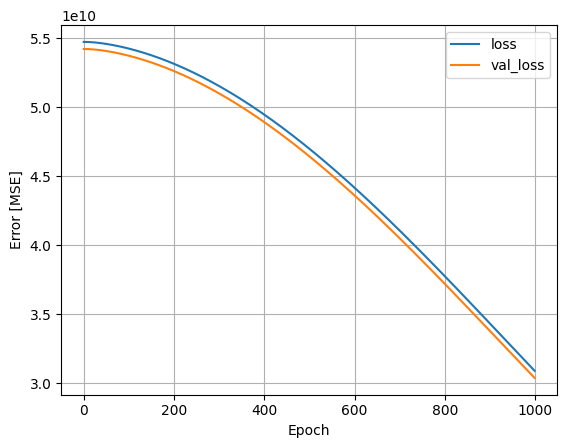

In [69]:
plot_loss(base_history)

Evaluamos la predicción inicial para train

In [70]:
def plot_prices_dist(y_pred, y_pred_test):
    precios_train = pd.concat([y_train, pd.DataFrame(y_pred, columns=['predicted'])], axis=1)
    precios_test = pd.concat([y_test, pd.DataFrame(y_pred_test, columns=['predicted'])], axis=1)
    fig, axs = plt.subplots(1, 3, figsize=(25, 5))

    fig.suptitle("Distribución de precios reales y predichos")

    axs[0].set_xlabel("Precio")
    axs[0].set_ylabel("Densidad")
    axs[0].set_title("Train")
    sns.kdeplot(precios_train['property_price'], ax=axs[0])
    sns.kdeplot(precios_train['predicted'], ax=axs[0])
    axs[0].legend(labels=['Real', 'Predicho'])

    axs[1].set_xlabel("Precio")
    axs[1].set_ylabel("Densidad")
    axs[1].set_title("Test")
    sns.kdeplot(precios_test['property_price'], ax=axs[1])
    sns.kdeplot(precios_test['predicted'], ax=axs[1])
    axs[1].legend(labels=['Real', 'Predicho'])

    axs[2].set_xlabel("Precio Real")
    axs[2].set_ylabel("Precio Predicho")
    axs[2].set_title("Real vs predicho")
    sns.scatterplot(x=precios_train['property_price'], y=precios_train['predicted'], ax=axs[2])
    sns.regplot(x=precios_train['property_price'], y=precios_train['predicted'], scatter=False, ax=axs[2], fit_reg=True,
                color='darkgreen', ci=0)
    axs[2].legend(labels=['Real', 'Predicho'])

In [71]:
y_pred_base = base_model.predict(x_train_tp1_transform)
y_pred_test_base = base_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 221us/step


Metricas Red Neuronal Base - Train
El error (mse) es: 30708967752.86027
El error (rmse) es: 175239.74364527094
El error (r²) es: -0.419082792948301

Metricas Red Neuronal Base - Test
El error (mse) es: 26247111589.862526
El error (rmse) es: 162009.60338776998
El error (r²) es: -0.39006520349644



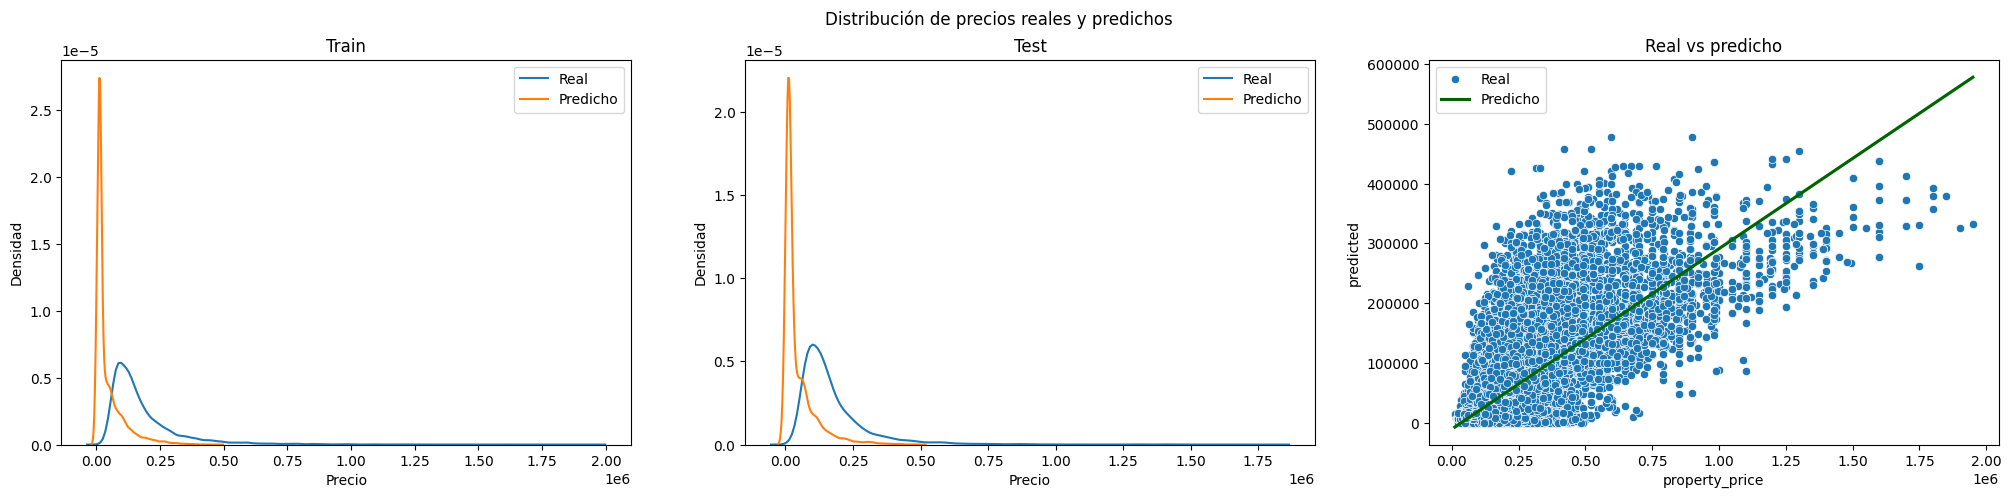

In [72]:
plot_prices_dist(y_pred_base, y_pred_test_base)
regression_metrics("Metricas Red Neuronal Base - Train", y_train, y_pred_base)
regression_metrics("Metricas Red Neuronal Base - Test", y_test, y_pred_test_base)

Vemos que hay mucha dispersión respecto a los precios reales, probaremos un modelo profundo con una capa intermedia con la mitad de las neuronas de la primera.

##### Modelo de 3 capas

In [73]:
def larger_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(int(d_in / 2), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal', activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [74]:
larger_model_builder().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [75]:
larger_model = larger_model_builder()
larger_history = larger_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
)

Epoch 1/1000
47/47 [==============================] - 0s 2ms/step - loss: 54733934592.0000 - val_loss: 54222172160.0000
Epoch 2/1000
47/47 [==============================] - 0s 803us/step - loss: 54733860864.0000 - val_loss: 54222045184.0000
Epoch 3/1000
47/47 [==============================] - 0s 675us/step - loss: 54733615104.0000 - val_loss: 54221627392.0000
Epoch 4/1000
47/47 [==============================] - 0s 689us/step - loss: 54732984320.0000 - val_loss: 54220713984.0000
Epoch 5/1000
47/47 [==============================] - 0s 648us/step - loss: 54731743232.0000 - val_loss: 54219055104.0000
Epoch 6/1000
47/47 [==============================] - 0s 638us/step - loss: 54729646080.0000 - val_loss: 54216462336.0000
Epoch 7/1000
47/47 [==============================] - 0s 740us/step - loss: 54726512640.0000 - val_loss: 54212685824.0000
Epoch 8/1000
47/47 [==============================] - 0s 745us/step - loss: 54722109440.0000 - val_loss: 54207549440.0000
Epoch 9/1000
47/47 [======

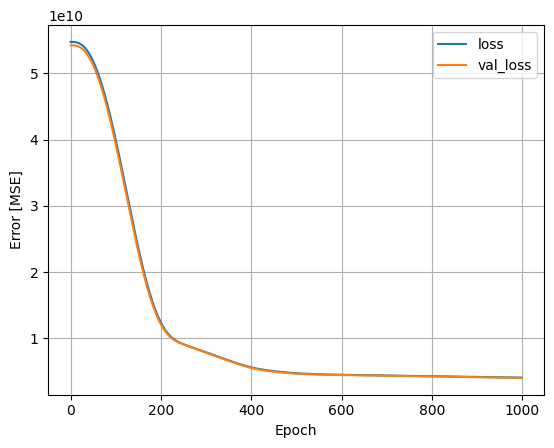

In [76]:
plot_loss(larger_history)

In [77]:
y_pred_larger = larger_model.predict(x_train_tp1_transform)
y_pred_larger_test = larger_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 231us/step


Metricas Red Neuronal Profunda - Train
El error (mse) es: 4035483555.1532445
El error (rmse) es: 63525.4559617894
El error (r²) es: 0.8135174936379809

Metricas Red Neuronal Profunda - Test
El error (mse) es: 3716796963.107744
El error (rmse) es: 60965.539143910995
El error (r²) es: 0.8031558592956636



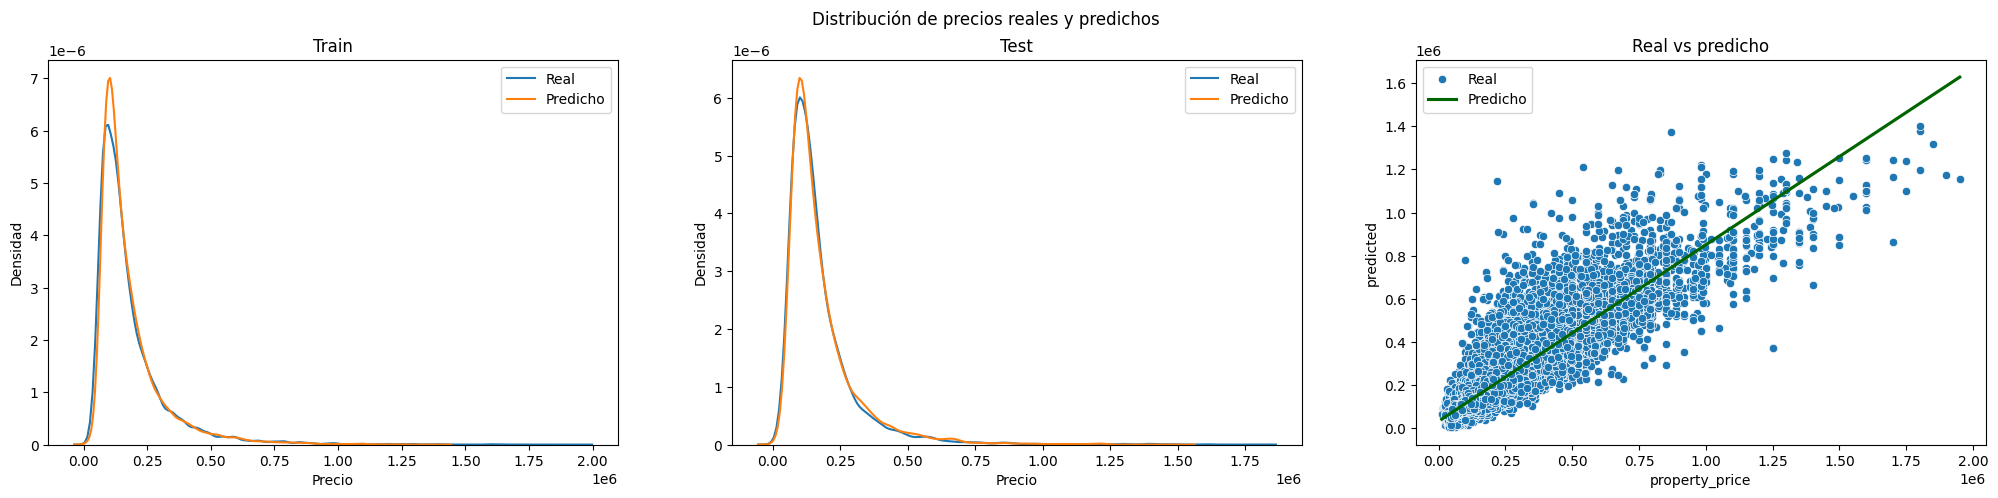

In [78]:
plot_prices_dist(y_pred_larger, y_pred_larger_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_larger)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_larger_test)

Por último, probaremos un tercer modelo con una capa inical más ancha.

##### Modelo ancho

In [79]:
def wider_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in * 2, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal', activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [80]:
wider_model_builder().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [81]:
wider_model = wider_model_builder()
wider_history = wider_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
)

Epoch 1/1000
47/47 [==============================] - 0s 2ms/step - loss: 54733922304.0000 - val_loss: 54222168064.0000
Epoch 2/1000
47/47 [==============================] - 0s 707us/step - loss: 54733828096.0000 - val_loss: 54221996032.0000
Epoch 3/1000
47/47 [==============================] - 0s 644us/step - loss: 54733574144.0000 - val_loss: 54221627392.0000
Epoch 4/1000
47/47 [==============================] - 0s 642us/step - loss: 54733107200.0000 - val_loss: 54221037568.0000
Epoch 5/1000
47/47 [==============================] - 0s 622us/step - loss: 54732435456.0000 - val_loss: 54220263424.0000
Epoch 6/1000
47/47 [==============================] - 0s 618us/step - loss: 54731546624.0000 - val_loss: 54219280384.0000
Epoch 7/1000
47/47 [==============================] - 0s 682us/step - loss: 54730469376.0000 - val_loss: 54218096640.0000
Epoch 8/1000
47/47 [==============================] - 0s 627us/step - loss: 54729207808.0000 - val_loss: 54216736768.0000
Epoch 9/1000
47/47 [======

In [82]:
y_pred_wider = wider_model.predict(x_train_tp1_transform)
y_pred_wider_test = wider_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 223us/step


Metricas Red Neuronal Profunda - Train
El error (mse) es: 23383264035.193134
El error (rmse) es: 152915.8724109212
El error (r²) es: -0.08055692077825527

Metricas Red Neuronal Profunda - Test
El error (mse) es: 19612141641.994812
El error (rmse) es: 140043.35629366647
El error (r²) es: -0.03867260095430991



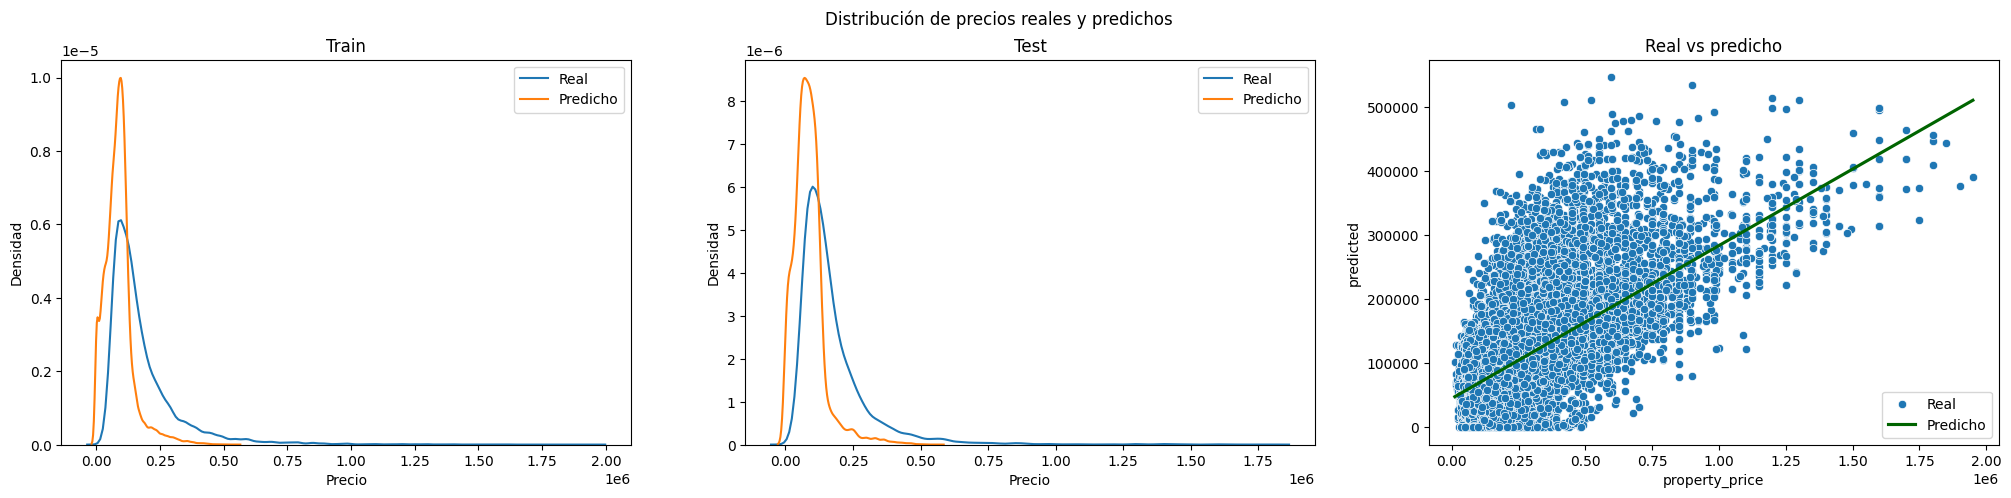

In [83]:
plot_prices_dist(y_pred_wider, y_pred_wider_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_wider)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_wider_test)

##### Análisis de métricas

Metricas Red Neuronal Profunda - Train
El error (mse) es: 4035483555.1532445
El error (rmse) es: 63525.4559617894
El error (r²) es: 0.8135174936379809

Metricas Red Neuronal Profunda - Test
El error (mse) es: 3716796963.107744
El error (rmse) es: 60965.539143910995
El error (r²) es: 0.8031558592956636



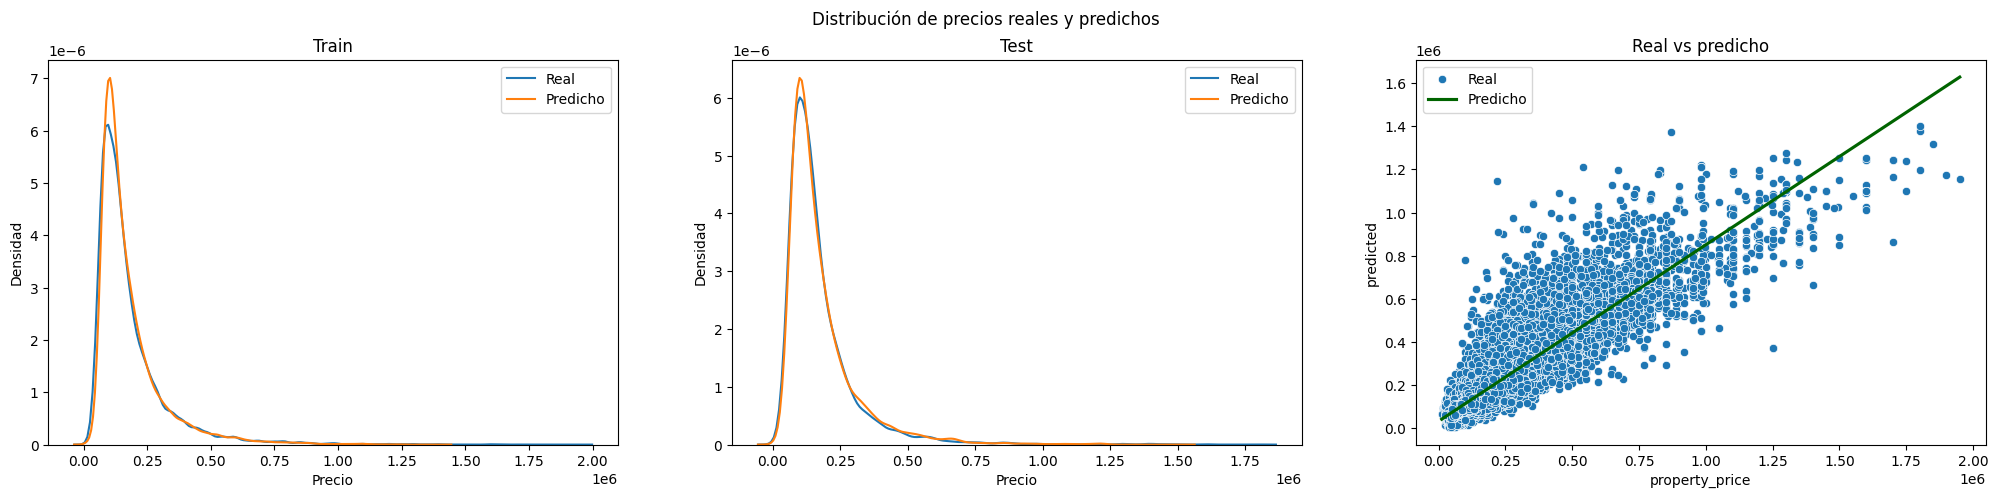

In [84]:
plot_prices_dist(y_pred_larger, y_pred_larger_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_larger)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_larger_test)

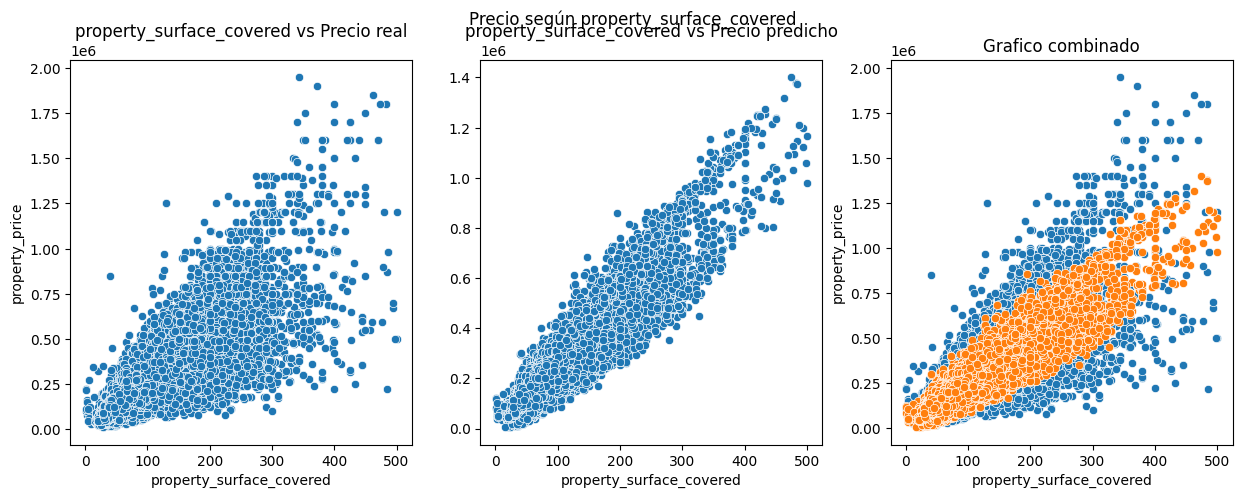

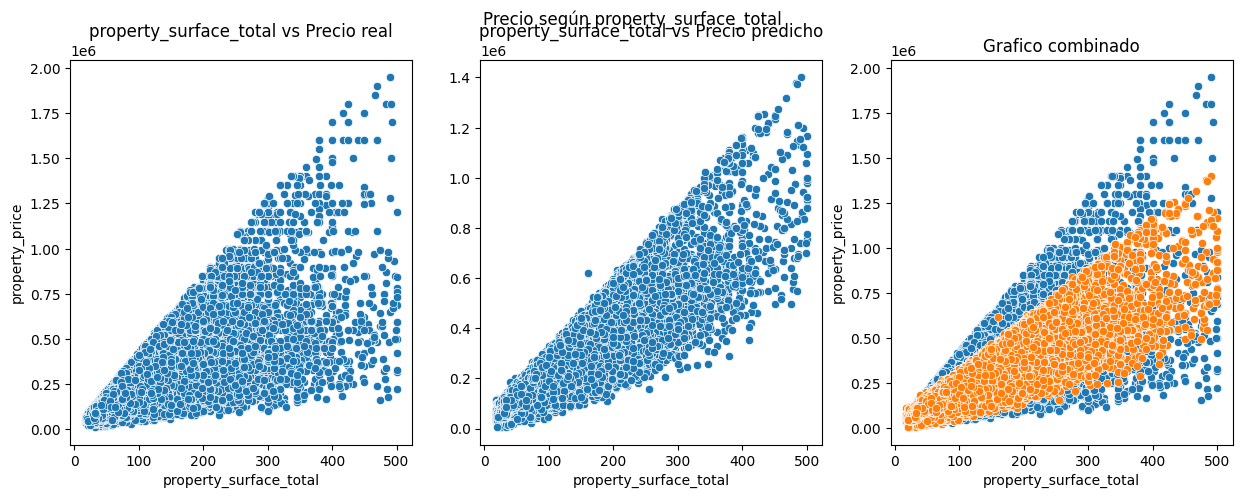

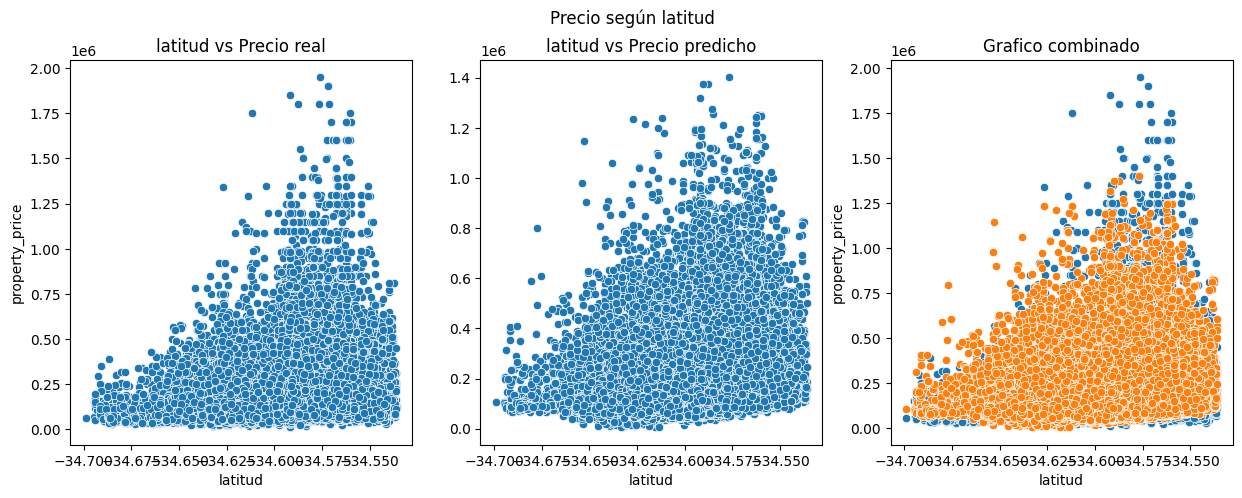

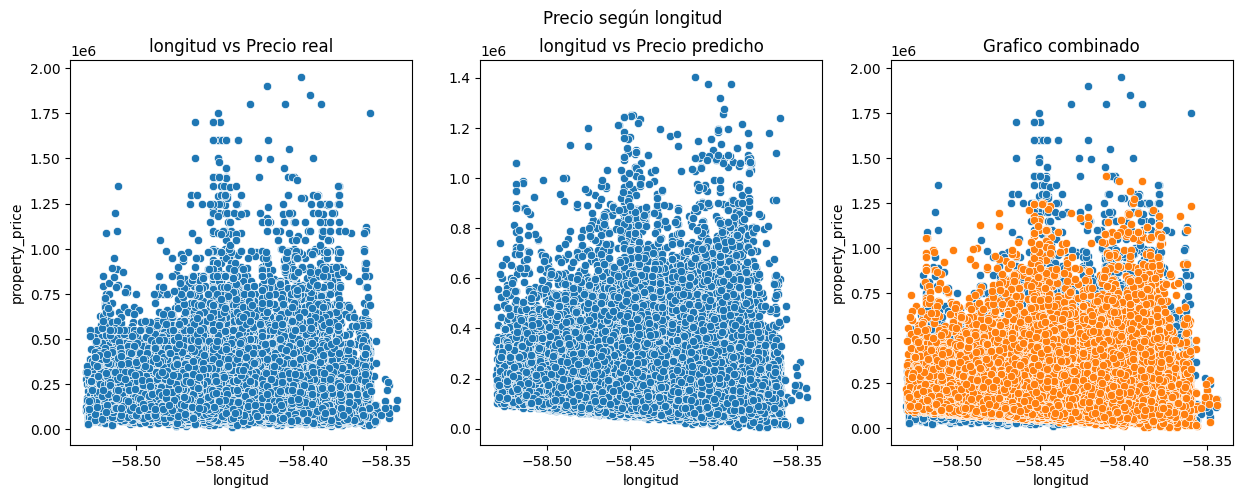

In [85]:
regression_scatter(ds_train.property_surface_covered, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.property_surface_total, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.latitud, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.longitud, y_train, y_pred_larger[:, 0])

Podemos ver que las predicciones mejoraron muchísimo y que los precios están cerca de los reales. Sin embargo, falta bastante para llegar a un buen resultado.

In [86]:
dump(larger_model, 'models/redes_neuronales_regresion.joblib')

INFO:tensorflow:Assets written to: ram://5165ee2b-d9bb-448c-8a4d-74b94fc6aef8/assets


['models/redes_neuronales_regresion.joblib']

#### Clasificación

In [87]:
def predicciones_clasificacion(modelo, x_train, x_test, y_train, y_test):
    # Predicciones Train
    output_modelo = modelo.predict(x_train)

    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_train, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)

    sns.heatmap(matriz_de_metricas, annot=True, cmap='Blues', fmt='g').set(
        title='Predicciones sobre el conjunto de entrenamiento')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))

    # Predicciones Test
    output_modelo = modelo.predict(x_test)

    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_test, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)

    sns.heatmap(matriz_de_metricas, annot=True, cmap='Blues', fmt='g').set(
        title='Predicciones sobre el conjunto de testeo')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))
    
def plot_convergion(train_history, cant_epochs):
    epochs = range(cant_epochs)
    plt.plot(epochs, train_history.history['loss'], color='orange', label='loss')
    plt.plot(epochs, train_history.history['accuracy'], color='blue', label='accuracy')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()

##### Preparación del dataset

In [88]:
scaler = StandardScaler()
ohe = OneHotEncoder()

In [89]:
x_train_tp1

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.551623 -58.491771         0              0             1.0   
1     -34.576289 -58.463635         1              1             3.0   
2     -34.600150 -58.378244         2              0             2.0   
3     -34.641450 -58.372804         3              0             4.0   
4     -34.629050 -58.468088         4              2             5.0   
...          ...        ...       ...            ...             ...   
69137 -34.608522 -58.430410        10              0             4.0   
69138 -34.625448 -58.524920        45              2             6.0   
69139 -34.558831 -58.462175         8              0             4.0   
69140 -34.604841 -58.495192        34              0             3.0   
69141 -34.628746 -58.463183         4              2             4.0   

       property_bedrooms  property_surface_total  property_surface_covered  
0                    1.0                    37.0                      33.0  
1                    2.0                   144.0                     144.0  
2                    1.0                    46.0                      41.0  
3                    3.0                    65.0                      65.0  
4                    4.0                   215.0                     155.0  
...                  ...                     ...                       ...  
69137                3.0                   103.0                      94.0  
69138                5.0                   300.0                     200.0  
69139                3.0                   129.0                     114.0  
69140                2.0                    64.0                      46.0  
69141                3.0                   165.0                     123.0  

[69142 rows x 8 columns]

In [90]:
x_train_clasificacion = x_train_tp1.drop(columns=['place_l3', 'property_type'])
x_train_clasificacion = x_train_clasificacion.join(ohe_property_type_train)

x_test_clasificacion = x_test_tp1.drop(columns=['place_l3', 'property_type'])
x_test_clasificacion = x_test_clasificacion.join(ohe_property_type_train)
x_train_clasificacion

latitud   longitud  property_rooms  property_bedrooms  \
0     -34.551623 -58.491771             1.0                1.0   
1     -34.576289 -58.463635             3.0                2.0   
2     -34.600150 -58.378244             2.0                1.0   
3     -34.641450 -58.372804             4.0                3.0   
4     -34.629050 -58.468088             5.0                4.0   
...          ...        ...             ...                ...   
69137 -34.608522 -58.430410             4.0                3.0   
69138 -34.625448 -58.524920             6.0                5.0   
69139 -34.558831 -58.462175             4.0                3.0   
69140 -34.604841 -58.495192             3.0                2.0   
69141 -34.628746 -58.463183             4.0                3.0   

       property_surface_total  property_surface_covered  property_type_Casa  \
0                        37.0                      33.0                   0   
1                       144.0                     144.0                   0   
2                        46.0                      41.0                   0   
3                        65.0                      65.0                   0   
4                       215.0                     155.0                   1   
...                       ...                       ...                 ...   
69137                   103.0                      94.0                   0   
69138                   300.0                     200.0                   1   
69139                   129.0                     114.0                   0   
69140                    64.0                      46.0                   0   
69141                   165.0                     123.0                   1   

       property_type_Departamento  property_type_PH  
0                               1                 0  
1                               0                 1  
2                               1                 0  
3                               1                 0  
4                               0                 0  
...                           ...               ...  
69137                           1                 0  
69138                           0                 0  
69139                           1                 0  
69140                           1                 0  
69141                           0                 0  

[69142 rows x 9 columns]

In [91]:
# Escalamos los datos
x_train_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_train_clasificacion))
x_test_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_test_clasificacion))

In [92]:
# Realizamos el one hot encoder para transformar la variable target en numérica tanto en train como test
enc = OneHotEncoder()
y_train_encoded = enc.fit_transform(y_train_clasificacion[:, np.newaxis]).toarray()
y_test_encoded = enc.transform(y_test_clasificacion[:, np.newaxis]).toarray()

/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_7446/3141594706.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoded = enc.fit_transform(y_train_clasificacion[:, np.newaxis]).toarray()
/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_7446/3141594706.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoded = enc.transform(y_test_clasificacion[:, np.newaxis]).toarray()


##### Modelo de  2 capas

In [93]:
cantidad_de_posibles_respuestas = len(np.unique(y_train_clasificacion))
cantidad_de_variables_predictoras = x_train_clasificacion.shape[1]
cantidad_de_posibles_respuestas, cantidad_de_variables_predictoras
cant_epochs = 150
batch_size = 1000

In [94]:
def create_model_2_layers(activation1, activation2, neurons_first_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation2)
    ])
    
    modelo.compile(
      optimizer= keras.optimizers.Adam(learning_rate=0.001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

Haremos uso de Randomsearch para determinar cuantas neuronas debería tener la primera capa y que función de activación debería tener cada capa, teniendo en cuenta que siendo una red de clasificación la función de la última capa debe ser o la función sigmoidea o softmax.

In [96]:
from keras.wrappers.scikit_learn import KerasClassifier

modelo = KerasClassifier(build_fn=create_model_2_layers)

n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_last_layer, 
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)


grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, random_state=14, verbose=False)
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_7446/3862005630.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn=create_model_2_layers)
2022-12-08 13:20:13.175671: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 13:20:13.193342: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 13:20:13.228874: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 13:20:13.232318: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 13:20:13.242131: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 13:20:13.251848: W tensorflow/core/platform/profile

Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1856 - accuracy: 0.3142
Epoch 2/150
56/56 [==============================] - 0s 936us/step - loss: 1.3331 - accuracy: 0.2512
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0679 - accuracy: 0.4908
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0673 - accuracy: 0.4402
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.4986
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.2243 - accuracy: 0.2506
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0466 - accuracy: 0.4909
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0514 - accuracy: 0.4859
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.1471 - accuracy: 0.3214

In [97]:
grid_result.best_params_

{'neurons_first_layer': 18,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 9,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1000,
 'activation2': 'sigmoid',
 'activation1': 'tanh'}

In [98]:
params = grid_result.best_params_
mejor_modelo_2_capas = create_model_2_layers(params['activation1'], params['activation2'],params['neurons_first_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_2_capas.summary()
mejor_modelo_2_capas.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)

x = mejor_modelo_2_capas.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 18)                180       
                                                                 
 dense_15 (Dense)            (None, 3)                 57        
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


Nos aseguramos que el optimizador esté convergiendo correctamente al mínimo encontrado y no comience a rebotar

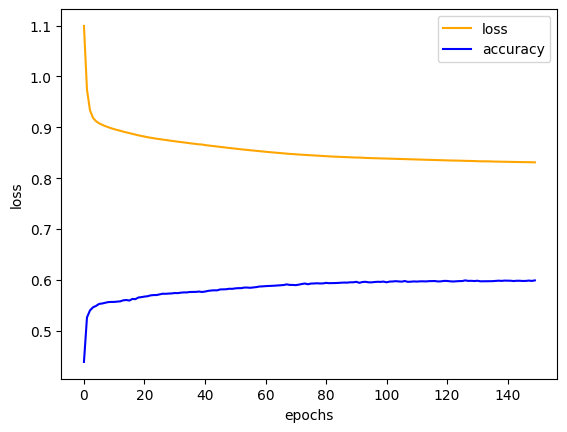

In [99]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 265us/step


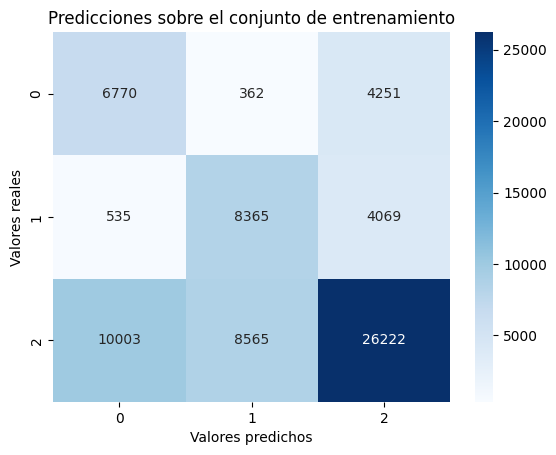

              precision    recall  f1-score   support

           0       0.39      0.59      0.47     11383
           1       0.48      0.64      0.55     12969
           2       0.76      0.59      0.66     44790

    accuracy                           0.60     69142
   macro avg       0.54      0.61      0.56     69142
weighted avg       0.65      0.60      0.61     69142

330/330 [==============================] - 0s 243us/step


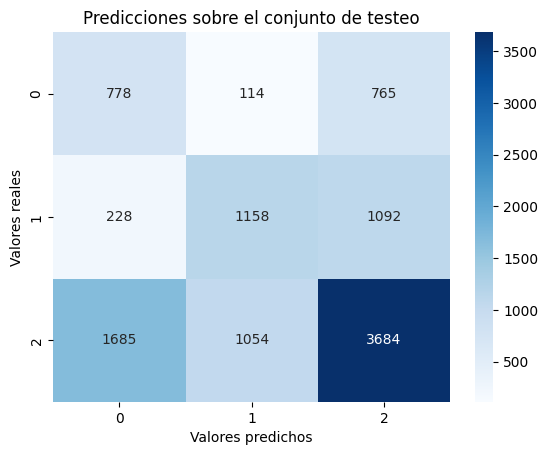

              precision    recall  f1-score   support

           0       0.29      0.47      0.36      1657
           1       0.50      0.47      0.48      2478
           2       0.66      0.57      0.62      6423

    accuracy                           0.53     10558
   macro avg       0.48      0.50      0.49     10558
weighted avg       0.57      0.53      0.54     10558



In [100]:
predicciones_clasificacion(mejor_modelo_2_capas, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

##### Modelo de 3 capas

Ahora probamos con un modelo de una capa adicional, debemos averiguar cuantas neuronas poner en la primera capa y cuantas neuronas deben haber en la capa oculta, además de las funciones de activación

In [101]:
def create_model_3_layers(activation1, activation2, activation3, neurons_first_layer,neurons_hidden_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(neurons_hidden_layer, activation=activation2),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation3)
    ])
    
    modelo.compile(
      optimizer= keras.optimizers.Adam(learning_rate=0.001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

modelo = KerasClassifier(build_fn=create_model_3_layers)

cant_epochs = 150


n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_layers, 
    activation3 = activation_last_layer,
    neurons_hidden_layer = cant_neuronas,
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)

grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, random_state= 14, verbose=False, scoring='accuracy')
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150


/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_7446/1368069688.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn=create_model_3_layers)


Epoch 1/150
Epoch 1/150
56/56 [==============================] - 0s 562us/step - loss: 1.0977 - accuracy: 0.4670
Epoch 2/150
56/56 [==============================] - 0s 726us/step - loss: 1.0579 - accuracy: 0.4738
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0789 - accuracy: 0.3922
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.2661 - accuracy: 0.2503
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0405 - accuracy: 0.4738
Epoch 4/150
56/56 [==============================] - 0s 808us/step - loss: 1.0109 - accuracy: 0.5037
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.2299 - accuracy: 0.3024
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0371 - accuracy: 0.4999
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.1094 - accuracy: 0.2958
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0883 - accuracy:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 998us/step - loss: 0.8516 - accuracy: 0.5870
Epoch 149/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8488 - accuracy: 0.5916
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8450 - accuracy: 0.5933
Epoch 147/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8405 - accuracy: 0.5963
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8514 - accuracy: 0.5875
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8420 - accuracy: 0.5942
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8449 - accuracy: 0.5923
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8488 - accuracy: 0.5916
Epoch 149/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8419 - accuracy: 0.5944
Epoch 149/150
12/56 [=====>........................] - ETA: 0s - loss: 1.1616 - accuracy: 0.3718Epoch 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.8446 - accuracy: 0.5930
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.5920
Epoch 150/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8445 - accuracy: 0.5932
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9779 - accuracy: 0.5164
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9500 - accuracy: 0.5245
Epoch 4/150
56/56 [==============================] - 0s 3ms/step - loss: 1.2006 - accuracy: 0.3585
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9340 - accuracy: 0.5303
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0896 - accuracy: 0.4351
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0486 - accuracy: 0.4892
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9235 - accuracy: 0.5369
Epoch 6/150
56/5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.9028 - accuracy: 0.5520
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9369 - accuracy: 0.5355
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9532 - accuracy: 0.5232
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8974 - accuracy: 0.5554
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9309 - accuracy: 0.5330
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9309 - accuracy: 0.5357
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9248 - accuracy: 0.5441
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9381 - accuracy: 0.5279
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8930 - accuracy: 0.5588
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9234 - accuracy: 0.5379
Epoch 7/150
56/56 [=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 4ms/step - loss: 1.0281 - accuracy: 0.5013
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9213 - accuracy: 0.5417
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9107 - accuracy: 0.5524
Epoch 8/150
56/56 [==============================] - 0s 4ms/step - loss: 1.0689 - accuracy: 0.4881
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8861 - accuracy: 0.5642
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0483 - accuracy: 0.4992
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9121 - accuracy: 0.5517
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9934 - accuracy: 0.5031
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9055 - accuracy: 0.5548
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9143 - accuracy: 0.5456
Epoch 8/150
56/56 [==

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8605 - accuracy: 0.5803
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8256 - accuracy: 0.6013
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8484 - accuracy: 0.5883
Epoch 146/150
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.5809
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5886
Epoch 146/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8598 - accuracy: 0.5813
Epoch 149/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8482 - accuracy: 0.5882
Epoch 147/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8553 - accuracy: 0.5855
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8595 - accuracy: 0.5812
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8482 - accurac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 919us/step - loss: 0.9475 - accuracy: 0.5242
Epoch 5/150
56/56 [==============================] - 0s 783us/step - loss: 0.9342 - accuracy: 0.5306
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9250 - accuracy: 0.5348
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1980 - accuracy: 0.4076
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1058 - accuracy: 0.4170
Epoch 2/150
 1/56 [..............................] - ETA: 9s - loss: 1.1178 - accuracy: 0.3820

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.9182 - accuracy: 0.5401
Epoch 8/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0795 - accuracy: 0.4369
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0187 - accuracy: 0.4837
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.5427
Epoch 9/150
56/56 [==============================] - 0s 759us/step - loss: 0.9865 - accuracy: 0.5107
Epoch 4/150
56/56 [==============================] - 0s 742us/step - loss: 0.9946 - accuracy: 0.5060
Epoch 4/150
56/56 [==============================] - 0s 789us/step - loss: 1.0429 - accuracy: 0.4593
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0686 - accuracy: 0.4597
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9081 - accuracy: 0.5472
Epoch 10/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9630 - accuracy: 0.5174


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0000 - accuracy: 0.5027
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9613 - accuracy: 0.5218
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9822 - accuracy: 0.5073
Epoch 3/150
433/433 [==============================] - 0s 1ms/step
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9038 - accuracy: 0.5497
Epoch 11/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9613 - accuracy: 0.5162
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9444 - accuracy: 0.5237
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9359 - accuracy: 0.5388
Epoch 6/150
56/56 [==============================] - 0s 896us/step - loss: 0.8998 - accuracy: 0.5533
Epoch 12/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9481 - accuracy: 0.5211
Epoch 4/150
56/56 [===================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.5766
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8772 - accuracy: 0.5702
Epoch 99/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8574 - accuracy: 0.5906
Epoch 97/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8714 - accuracy: 0.5756
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8805 - accuracy: 0.5653
Epoch 96/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.5914
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8494 - accuracy: 0.5933
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8514 - accuracy: 0.5873
Epoch 107/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8706 - accuracy: 0.5763
Epoch 96/150
56/56 [==============================] - 0s 905us/step - loss: 0.8771 - accuracy: 0.5700
Epoch 100/

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 897us/step - loss: 0.8655 - accuracy: 0.5812
Epoch 150/150
56/56 [==============================] - 0s 987us/step - loss: 0.8955 - accuracy: 0.5614
Epoch 51/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8682 - accuracy: 0.5771
Epoch 147/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8763 - accuracy: 0.5695
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.5938
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8951 - accuracy: 0.5608
Epoch 52/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8762 - accuracy: 0.5698
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8682 - accuracy: 0.5765
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8947 - accuracy: 0.5611
Epoch 53/150
56/56 [==============================] - 0s 869us/step - loss: 0.8682 - accuracy: 0.5782
E

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 991us/step - loss: 0.8922 - accuracy: 0.5624
Epoch 59/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9735 - accuracy: 0.5052
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8917 - accuracy: 0.5626
Epoch 60/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9390 - accuracy: 0.5259
Epoch 4/150
56/56 [==============================] - 0s 889us/step - loss: 0.8912 - accuracy: 0.5620
Epoch 61/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9213 - accuracy: 0.5402
Epoch 5/150
39/56 [===================>..........] - ETA: 0s - loss: 0.8873 - accuracy: 0.5657

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8908 - accuracy: 0.5624
Epoch 62/150
433/433 [==============================] - 0s 833us/step 0.9203 - accuracy: 0.54
Epoch 1/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9141 - accuracy: 0.5451
Epoch 6/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8904 - accuracy: 0.5638
Epoch 63/150
15/56 [=======>......................] - ETA: 0s - loss: 1.0894 - accuracy: 0.4220 Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.9101 - accuracy: 0.5491
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8899 - accuracy: 0.5633
Epoch 64/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0380 - accuracy: 0.4804
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.1605 - accuracy: 0.3349
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8894 - accuracy: 0.5642
Epoch 65/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9768 - accuracy: 0.5052
Epoch 3/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9074 - accuracy: 0.5489
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0094 - accuracy: 0.4892
Epoch 3/150
56/56 [==============================] - 1s 3ms/step - loss: 1.3498 - accuracy: 0.2646
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8890 - accuracy: 0.5638
Epoch 66/150
56/56 [

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 1/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8405 - accuracy: 0.5922
Epoch 83/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8389 - accuracy: 0.5948
Epoch 85/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8298 - accuracy: 0.5977
Epoch 85/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8418 - accuracy: 0.5983
Epoch 88/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8366 - accuracy: 0.5970
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8323 - accuracy: 0.5999
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.5970
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.5916
Epoch 85/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8257 - accuracy: 0.6022
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.5959
E

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.8251 - accuracy: 0.5991
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8360 - accuracy: 0.5955
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8202 - accuracy: 0.6055
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8356 - accuracy: 0.5948
Epoch 69/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8205 - accuracy: 0.6045
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8355 - accuracy: 0.5959
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 1.2015 - accuracy: 0.2521
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.5949
Epoch 71/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0473 - accuracy: 0.4999
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0933 - accuracy: 0.3506
Epoch 3/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8343 - accuracy: 0.5970
Epoch 73/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0357 - accuracy: 0.4862
Epoch 4/150
56/56 [==============================] - 0s 615us/step - loss: 1.0373 - accuracy: 0.5001
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0345 - accuracy: 0.4999
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8344 - accuracy: 0.5968
Epoch 74/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0154 - accuracy: 0.5022
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0317 - accuracy: 0.5001
Epoch 4/150
56/56 [==============================] - 0s 963us/step - loss: 1.0060 - accuracy: 0.4989
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0083 - accuracy: 0.5038
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8341 - accuracy: 0.5959
Epoch 75/150
410

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 1/150
56/56 [==============================] - 0s 833us/step - loss: 0.9930 - accuracy: 0.4981
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0297 - accuracy: 0.5003
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0720 - accuracy: 0.4022
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8337 - accuracy: 0.5971
Epoch 76/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0010 - accuracy: 0.5061
Epoch 7/150
56/56 [==============================] - 0s 858us/step - loss: 0.9795 - accuracy: 0.5002
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8335 - accuracy: 0.5965
Epoch 77/150
56/56 [==============================] - 0s 830us/step - loss: 0.9665 - accuracy: 0.5053
Epoch 7/150
 4/56 [=>............................] - ETA: 2s - loss: 1.3388 - accuracy: 0.2480

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 1.0273 - accuracy: 0.5004
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0342 - accuracy: 0.4970
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9928 - accuracy: 0.5075
Epoch 8/150
56/56 [==============================] - 0s 4ms/step - loss: 1.2299 - accuracy: 0.2503
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0242 - accuracy: 0.5006
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0188 - accuracy: 0.4987
Epoch 4/150
56/56 [==============================] - 0s 567us/step - loss: 1.0937 - accuracy: 0.2754
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8333 - accuracy: 0.5966
Epoch 78/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0200 - accuracy: 0.5012
Epoch 8/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0068 - accuracy: 0.5011
Epoch 5/150
56/56 [

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.8782 - accuracy: 0.5591
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8531 - accuracy: 0.5899
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8508 - accuracy: 0.5885
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8446 - accuracy: 0.5975
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.5671
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8812 - accuracy: 0.5622
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8885 - accuracy: 0.5557
Epoch 99/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8505 - accuracy: 0.5899
Epoch 92/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8782 - accuracy: 0.5593
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.5910
Epoch 88/

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8555 - accuracy: 0.5845
Epoch 47/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8435 - accuracy: 0.5965
Epoch 138/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8414 - accuracy: 0.5957
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.5980
Epoch 129/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8408 - accuracy: 0.5931
Epoch 141/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8546 - accuracy: 0.5859
Epoch 48/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8434 - accuracy: 0.5957
Epoch 139/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8411 - accuracy: 0.5956
Epoch 137/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8356 - accuracy: 0.5981
Epoch 130/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8539 - accuracy:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8431 - accuracy: 0.5956
Epoch 141/150
56/56 [==============================] - 0s 971us/step - loss: 0.8352 - accuracy: 0.5983
Epoch 132/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8408 - accuracy: 0.5966
Epoch 139/150
56/56 [==============================] - 0s 986us/step - loss: 0.8525 - accuracy: 0.5872
Epoch 51/150
56/56 [==============================] - 0s 974us/step - loss: 0.8430 - accuracy: 0.5959
Epoch 142/150
56/56 [==============================] - 0s 962us/step - loss: 0.8351 - accuracy: 0.5981
Epoch 133/150
56/56 [==============================] - 0s 994us/step - loss: 0.8404 - accuracy: 0.5962
Epoch 140/150
56/56 [==============================] - 0s 879us/step - loss: 0.8516 - accuracy: 0.5879
Epoch 52/150
56/56 [==============================] - 0s 974us/step - loss: 0.8400 - accuracy: 0.5927
Epoch 145/150
56/56 [==============================] - 0s 941us/step - loss: 0.8428 - accurac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 966us/step - loss: 0.8396 - accuracy: 0.5933
Epoch 147/150
56/56 [==============================] - 0s 772us/step - loss: 0.8425 - accuracy: 0.5958
Epoch 145/150
56/56 [==============================] - 0s 786us/step - loss: 0.8347 - accuracy: 0.5984
Epoch 136/150
56/56 [==============================] - 0s 758us/step - loss: 0.8399 - accuracy: 0.5959
Epoch 143/150
56/56 [==============================] - 0s 744us/step - loss: 0.8498 - accuracy: 0.5887
Epoch 55/150
56/56 [==============================] - 0s 741us/step - loss: 0.8424 - accuracy: 0.5972
Epoch 146/150
56/56 [==============================] - 0s 876us/step - loss: 0.8395 - accuracy: 0.5927
Epoch 148/150
56/56 [==============================] - 0s 758us/step - loss: 0.8346 - accuracy: 0.5983
Epoch 137/150
56/56 [==============================] - 0s 732us/step - loss: 0.8398 - accuracy: 0.5959
Epoch 144/150
56/56 [==============================] - 0s 772us/step - loss: 0.8491 - ac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 620us/step - loss: 0.8432 - accuracy: 0.5932
Epoch 68/150
56/56 [==============================] - 0s 633us/step - loss: 0.8334 - accuracy: 0.5982
Epoch 150/150
56/56 [==============================] - 0s 598us/step - loss: 0.8428 - accuracy: 0.5931
Epoch 69/150
56/56 [==============================] - 0s 585us/step - loss: 0.8425 - accuracy: 0.5926
Epoch 70/150
56/56 [==============================] - 0s 605us/step - loss: 0.8422 - accuracy: 0.5945
Epoch 71/150
56/56 [==============================] - 0s 574us/step - loss: 0.8419 - accuracy: 0.5935
Epoch 72/150
56/56 [==============================] - 0s 582us/step - loss: 0.8414 - accuracy: 0.5938
Epoch 73/150
56/56 [==============================] - 0s 599us/step - loss: 0.8411 - accuracy: 0.5946
Epoch 74/150
56/56 [==============================] - 0s 583us/step - loss: 0.8408 - accuracy: 0.5951
Epoch 75/150
56/56 [==============================] - 0s 568us/step - loss: 0.8404 - accuracy:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 574us/step - loss: 0.8389 - accuracy: 0.5964
Epoch 81/150
56/56 [==============================] - 0s 579us/step - loss: 0.8386 - accuracy: 0.5963
Epoch 82/150
56/56 [==============================] - 0s 569us/step - loss: 0.8383 - accuracy: 0.5964
Epoch 83/150
56/56 [==============================] - 0s 564us/step - loss: 0.8380 - accuracy: 0.5967
Epoch 84/150
56/56 [==============================] - 0s 567us/step - loss: 0.8379 - accuracy: 0.5966
Epoch 85/150
56/56 [==============================] - 0s 573us/step - loss: 0.8374 - accuracy: 0.5971
Epoch 86/150
56/56 [==============================] - 0s 562us/step - loss: 0.8372 - accuracy: 0.5978
Epoch 87/150
56/56 [==============================] - 0s 568us/step - loss: 0.8370 - accuracy: 0.5979
Epoch 88/150
56/56 [==============================] - 0s 574us/step - loss: 0.8367 - accuracy: 0.5978
Epoch 89/150
56/56 [==============================] - 0s 576us/step - loss: 0.8365 - accuracy: 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


70/70 [==============================] - 1s 518us/step - loss: 1.4778 - accuracy: 0.2605
Epoch 2/150
70/70 [==============================] - 0s 441us/step - loss: 1.2169 - accuracy: 0.3104
Epoch 3/150
70/70 [==============================] - 0s 444us/step - loss: 1.0969 - accuracy: 0.4143
Epoch 4/150
70/70 [==============================] - 0s 440us/step - loss: 1.0469 - accuracy: 0.4769
Epoch 5/150
70/70 [==============================] - 0s 426us/step - loss: 1.0257 - accuracy: 0.5007
Epoch 6/150
70/70 [==============================] - 0s 421us/step - loss: 1.0139 - accuracy: 0.5048
Epoch 7/150
70/70 [==============================] - 0s 418us/step - loss: 1.0038 - accuracy: 0.5080
Epoch 8/150
70/70 [==============================] - 0s 432us/step - loss: 0.9935 - accuracy: 0.5109
Epoch 9/150
70/70 [==============================] - 0s 422us/step - loss: 0.9826 - accuracy: 0.5107
Epoch 10/150
70/70 [==============================] - 0s 439us/step - loss: 0.9716 - accuracy: 0.5115
E

In [103]:
grid_result.best_params_

{'neurons_hidden_layer': 4,
 'neurons_first_layer': 4,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 9,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1000,
 'activation3': 'softmax',
 'activation2': 'tanh',
 'activation1': 'sigmoid'}

In [104]:
params = grid_result.best_params_
mejor_modelo_3_capas = create_model_3_layers(params['activation1'], params['activation2'], params['activation3'],params['neurons_first_layer'], params['neurons_hidden_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_3_capas.summary()
mejor_modelo_3_capas.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)
cant_epochs = 150

x = mejor_modelo_3_capas.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 4)                 40        
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


Vemos como el modelo converge correctamente

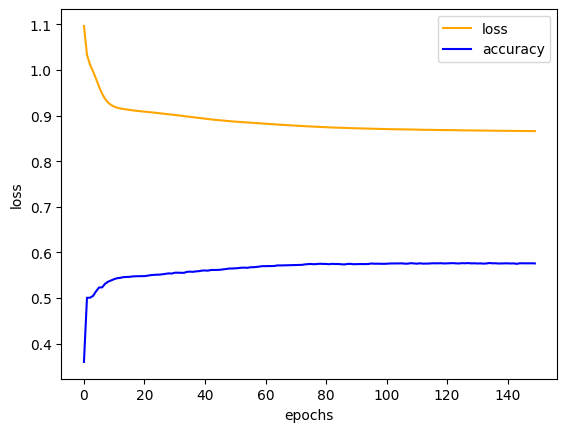

In [105]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 255us/step


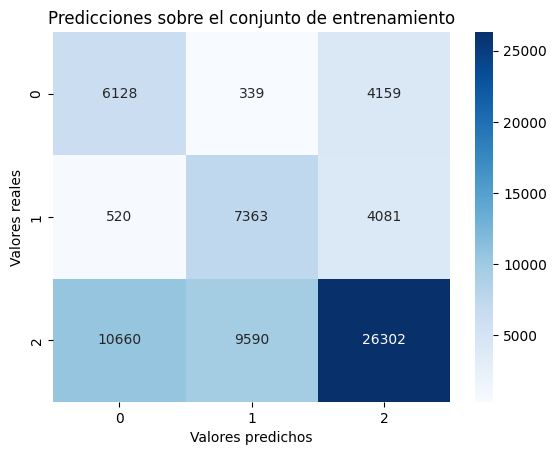

              precision    recall  f1-score   support

           0       0.35      0.58      0.44     10626
           1       0.43      0.62      0.50     11964
           2       0.76      0.57      0.65     46552

    accuracy                           0.58     69142
   macro avg       0.51      0.59      0.53     69142
weighted avg       0.64      0.58      0.59     69142

330/330 [==============================] - 0s 249us/step


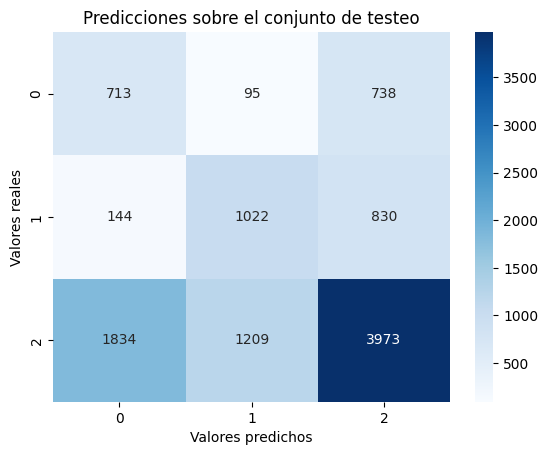

              precision    recall  f1-score   support

           0       0.26      0.46      0.34      1546
           1       0.44      0.51      0.47      1996
           2       0.72      0.57      0.63      7016

    accuracy                           0.54     10558
   macro avg       0.47      0.51      0.48     10558
weighted avg       0.60      0.54      0.56     10558



In [106]:
predicciones_clasificacion(mejor_modelo_3_capas, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

##### Modelos haciendo uso del dataset ampliado

In [107]:
x_train_clasificacion = x_train.drop(columns=['place_l3', 'property_type'])
x_train_clasificacion = x_train_clasificacion.join(ohe_property_type_train)

x_test_clasificacion = x_test.drop(columns=['place_l3', 'property_type'])
x_test_clasificacion = x_test_clasificacion.join(ohe_property_type_train)

# Escalamos los datos
x_train_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_train_clasificacion))
x_test_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_test_clasificacion))


cantidad_de_posibles_respuestas = len(np.unique(y_train_clasificacion))
cantidad_de_variables_predictoras = x_train_clasificacion.shape[1]

print(cantidad_de_posibles_respuestas, cantidad_de_variables_predictoras)
x_train_clasificacion

3 14


latitud   longitud  property_rooms  property_bedrooms  \
0     -34.551623 -58.491771             1.0                1.0   
1     -34.576289 -58.463635             3.0                2.0   
2     -34.600150 -58.378244             2.0                1.0   
3     -34.641450 -58.372804             4.0                3.0   
4     -34.629050 -58.468088             5.0                4.0   
...          ...        ...             ...                ...   
69137 -34.608522 -58.430410             4.0                3.0   
69138 -34.625448 -58.524920             6.0                5.0   
69139 -34.558831 -58.462175             4.0                3.0   
69140 -34.604841 -58.495192             3.0                2.0   
69141 -34.628746 -58.463183             4.0                3.0   

       property_surface_total  property_surface_covered  score_sentimientos  \
0                        37.0                      33.0                   5   
1                       144.0                     144.0                  35   
2                        46.0                      41.0                  17   
3                        65.0                      65.0                   9   
4                       215.0                     155.0                  33   
...                       ...                       ...                 ...   
69137                   103.0                      94.0                  13   
69138                   300.0                     200.0                   9   
69139                   129.0                     114.0                  54   
69140                    64.0                      46.0                   3   
69141                   165.0                     123.0                  44   

       pileta  parrilla  balcon  sum  property_type_Casa  \
0           0         0       0    0                   0   
1           0         0       0    1                   0   
2           0         0       0    1                   0   
3           0         0       1    1                   0   
4           0         1       0    1                   1   
...       ...       ...     ...  ...                 ...   
69137       0         0       1    0                   0   
69138       0         0       0    0                   1   
69139       0         0       1    0                   0   
69140       0         0       0    0                   0   
69141       0         0       0    0                   1   

       property_type_Departamento  property_type_PH  
0                               1                 0  
1                               0                 1  
2                               1                 0  
3                               1                 0  
4                               0                 0  
...                           ...               ...  
69137                           1                 0  
69138                           0                 0  
69139                           1                 0  
69140                           1                 0  
69141                           0                 0  

[69142 rows x 14 columns]

In [108]:
len(x_train_clasificacion_scaled[0])

14

##### Modelo 2 capas

In [109]:
def create_model_2_layers_expanded_ds(activation1, activation2, neurons_first_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation2)
    ])
    
    modelo.compile(
      optimizer= keras.optimizers.Adam(learning_rate=0.001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

In [110]:
modelo = KerasClassifier(build_fn= create_model_2_layers_expanded_ds)

n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_last_layer, 
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)


grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, random_state=14, verbose=False, scoring='accuracy')
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

Epoch 1/150
Epoch 1/150


/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_7446/2961756270.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn= create_model_2_layers_expanded_ds)


Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
56/56 [==============================] - 0s 2ms/step - loss: 1.2055 - accuracy: 0.2636
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.4352 - accuracy: 0.2804
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0503 - accuracy: 0.4633
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0234 - accuracy: 0.4876
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.3395 - accuracy: 0.2532
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.2087 - accuracy: 0.2994
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0402 - accuracy: 0.4952
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0634 - accuracy: 0.4954
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.2467 - accuracy: 0.3022
Epoch 3/150
56/56 [======

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 1.1605 - accuracy: 0.3610
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.3434 - accuracy: 0.3282
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0634 - accuracy: 0.4379
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 1.2650 - accuracy: 0.2666
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.2507 - accuracy: 0.3226
Epoch 2/150
56/56 [==============================] - 0s 637us/step - loss: 1.0144 - accuracy: 0.4989
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1631 - accuracy: 0.4247
Epoch 3/150
41/56 [====================>.........] - ETA: 0s - loss: 1.1538 - accuracy: 0.3495

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 652us/step - loss: 0.9846 - accuracy: 0.5154
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1445 - accuracy: 0.3640
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1349 - accuracy: 0.3738
Epoch 3/150
56/56 [==============================] - 0s 841us/step - loss: 0.9641 - accuracy: 0.5240
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0766 - accuracy: 0.4769
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0849 - accuracy: 0.4449
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1440 - accuracy: 0.3278
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0684 - accuracy: 0.4278
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 1.1614 - accuracy: 0.4806
Epoch 2/150
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0299 - accuracy: 0.4985
Epoch 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8668 - accuracy: 0.5755
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8684 - accuracy: 0.5758
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8680 - accuracy: 0.5750
Epoch 102/150
Epoch 105/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8492 - accuracy: 0.5918
Epoch 108/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8471 - accuracy: 0.5925
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8603 - accuracy: 0.5786
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.5884
Epoch 108/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8680 - accuracy: 0.5761
Epoch 103/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8677 - accuracy: 0.5752
Epoch 103/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8556 - accuracy

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


129/433 [=======>......................] - ETA: 0sEpoch 1/150
Epoch 1/150
433/433 [==============================] - 0s 743us/step
Epoch 1/150
56/56 [==============================] - 0s 916us/step - loss: 0.8577 - accuracy: 0.5832
Epoch 149/150
56/56 [==============================] - 0s 834us/step - loss: 0.8800 - accuracy: 0.5727
Epoch 54/150
56/56 [==============================] - 0s 849us/step - loss: 0.8796 - accuracy: 0.5729
Epoch 55/150
56/56 [==============================] - 0s 906us/step - loss: 0.8577 - accuracy: 0.5824
Epoch 150/150
56/56 [==============================] - 0s 831us/step - loss: 0.8791 - accuracy: 0.5723
Epoch 56/150
56/56 [==============================] - 0s 862us/step - loss: 0.8788 - accuracy: 0.5732
Epoch 57/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8783 - accuracy: 0.5725
Epoch 58/150
56/56 [==============================] - 0s 603us/step - loss: 1.2733 - accuracy: 0.3348
Epoch 2/150

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score



56/56 [==============================] - 0s 1ms/step - loss: 0.8779 - accuracy: 0.5733
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 1.2176 - accuracy: 0.4111
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.2499 - accuracy: 0.3433
Epoch 2/150
56/56 [==============================] - 0s 658us/step - loss: 1.0592 - accuracy: 0.4200
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0185 - accuracy: 0.5058
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0499 - accuracy: 0.4677
Epoch 3/150
56/56 [==============================] - 0s 658us/step - loss: 0.9928 - accuracy: 0.5045
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8776 - accuracy: 0.5739
Epoch 60/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0667 - accuracy: 0.4342
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0732 - accuracy: 0.4930
Epoch 3/150
56/

    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/L

56/56 [==============================] - 0s 623us/step - loss: 0.9457 - accuracy: 0.5280
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9541 - accuracy: 0.5252
Epoch 6/150
56/56 [==============================] - 0s 900us/step - loss: 0.9310 - accuracy: 0.5426
Epoch 7/150
56/56 [==============================] - 0s 870us/step - loss: 0.9321 - accuracy: 0.5378
Epoch 8/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8760 - accuracy: 0.5742
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9403 - accuracy: 0.5357
Epoch 6/150
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9218 - accuracy: 0.5502
Epoch 8/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9350 - accuracy: 0.5360
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1466 - accuracy: 0.4009
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.1078 - accuracy: 0.4226
Epo

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8346 - accuracy: 0.5991
Epoch 109/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8377 - accuracy: 0.5991
Epoch 109/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8377 - accuracy: 0.5983
Epoch 107/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8510 - accuracy: 0.5883
Epoch 97/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8474 - accuracy: 0.5885
Epoch 99/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8381 - accuracy: 0.5929
Epoch 109/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8325 - accuracy: 0.6003
Epoch 110/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8514 - accuracy: 0.5888
Epoch 93/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8345 - accuracy: 0.5994
Epoch 110/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8375 - accuracy: 0.5989
Epoch 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.5891
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.5890
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8617 - accuracy: 0.5872
Epoch 51/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8426 - accuracy: 0.5942
Epoch 150/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.5876
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.5893
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8615 - accuracy: 0.5870
Epoch 52/150
56/56 [==============================] - 0s 895us/step - loss: 0.8613 - accuracy: 0.5871
Epoch 53/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8475 - accuracy: 0.5902
Epoch 144/150
56/56 [==============================] - 0s 797us/step - loss: 0.8610 - accura

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 4ms/step - loss: 1.1264 - accuracy: 0.3994
Epoch 3/150
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8597 - accuracy: 0.5872
Epoch 62/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9012 - accuracy: 0.5587
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8985 - accuracy: 0.5646
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9784 - accuracy: 0.5042
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8595 - accuracy: 0.5876
Epoch 4/150
Epoch 63/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8934 - accuracy: 0.5631
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8984 - accuracy: 0.5631
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8901 - accuracy: 0.5710
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9412 - accuracy: 0.5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 14/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8585 - accuracy: 0.5871
Epoch 71/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8600 - accuracy: 0.5879
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9426 - accuracy: 0.5395
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8751 - accuracy: 0.5765
Epoch 12/150
56/56 [==============================] - 1s 5ms/step - loss: 1.1061 - accuracy: 0.4153
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8679 - accuracy: 0.5799
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.5379
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9210 - accuracy: 0.5529
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9867 - accuracy: 0.5121
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8584 - accuracy: 0.5872
Epoch

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8222 - accuracy: 0.6071
Epoch 107/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8293 - accuracy: 0.6036
Epoch 93/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8272 - accuracy: 0.6053
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8288 - accuracy: 0.6030
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8298 - accuracy: 0.6020
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8256 - accuracy: 0.6056
Epoch 107/150
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8254 - accuracy: 0.6039
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8249 - accuracy: 0.6074
Epoch 83/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8293 - accuracy: 0.6037
Epoch 94/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8286 - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8181 - accuracy: 0.6092
Epoch 132/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8255 - accuracy: 0.6035
Epoch 147/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8206 - accuracy: 0.6102
Epoch 145/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8370 - accuracy: 0.5975
Epoch 46/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8183 - accuracy: 0.6088
Epoch 133/150
56/56 [==============================] - 0s 710us/step - loss: 1.1368 - accuracy: 0.4210
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8210 - accuracy: 0.6080
Epoch 146/150
56/56 [==============================] - 0s 655us/step - loss: 0.9758 - accuracy: 0.5179
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8365 - accuracy: 0.5973
Epoch 47/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8180 - accuracy: 0.6093
Epoch 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.9121 - accuracy: 0.5556
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8350 - accuracy: 0.5987
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 1.1442 - accuracy: 0.3982
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8179 - accuracy: 0.6095
Epoch 138/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9165 - accuracy: 0.5527
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8185 - accuracy: 0.6124
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8344 - accuracy: 0.5998
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9065 - accuracy: 0.5589
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9673 - accuracy: 0.5143
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8175 - accuracy: 0.6091
Epoch 139/150
56

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8330 - accuracy: 0.6000
Epoch 57/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8174 - accuracy: 0.6093
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.5664
Epoch 12/150
56/56 [==============================] - 0s 951us/step - loss: 0.9451 - accuracy: 0.5368
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8327 - accuracy: 0.5999
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8976 - accuracy: 0.5617
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9084 - accuracy: 0.5539
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8173 - accuracy: 0.6087
Epoch 145/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8867 - accuracy: 0.5689
Epoch 13/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8326 - accuracy: 0.6001
Epoch 59/150

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8315 - accuracy: 0.6007
Epoch 63/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8783 - accuracy: 0.5736
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8792 - accuracy: 0.5718
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8832 - accuracy: 0.5697
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8943 - accuracy: 0.5622
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8871 - accuracy: 0.5669
Epoch 11/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8170 - accuracy: 0.6100
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8312 - accuracy: 0.6008
Epoch 64/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8767 - accuracy: 0.5743
Epoch 16/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8777 - accuracy: 0.5736
Epoch 18/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6029
Epoch 74/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8600 - accuracy: 0.5830
Epoch 26/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9060 - accuracy: 0.5572
Epoch 10/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8650 - accuracy: 0.5789
Epoch 22/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8652 - accuracy: 0.5773
Epoch 24/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8918 - accuracy: 0.5610
Epoch 12/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8715 - accuracy: 0.5760
Epoch 19/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8617 - accuracy: 0.5810
Epoch 29/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8586 - accuracy: 0.5839
Epoch 27/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8633 - accuracy: 0.5808
Epoch 23/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8130 - accuracy: 0.6136
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.5971
Epoch 101/150
56/56 [==============================] - 0s 952us/step - loss: 0.8348 - accuracy: 0.5956
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8347 - accuracy: 0.5965
Epoch 84/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8134 - accuracy: 0.6129
Epoch 116/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8191 - accuracy: 0.6089
Epoch 104/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8342 - accuracy: 0.6006
Epoch 98/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8412 - accuracy: 0.5981
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8118 - accuracy: 0.6121
Epoch 109/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8347 - accuracy: 0.5963
Epoch

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 1ms/step - loss: 0.8121 - accuracy: 0.6121
Epoch 146/150
56/56 [==============================] - 0s 943us/step - loss: 0.8374 - accuracy: 0.5997
Epoch 148/150
56/56 [==============================] - 0s 938us/step - loss: 0.8505 - accuracy: 0.5915
Epoch 43/150
56/56 [==============================] - 0s 967us/step - loss: 0.8293 - accuracy: 0.6025
Epoch 144/150
56/56 [==============================] - 0s 979us/step - loss: 0.8316 - accuracy: 0.5970
Epoch 147/150
56/56 [==============================] - 0s 894us/step - loss: 0.8373 - accuracy: 0.5986
Epoch 149/150
56/56 [==============================] - 0s 863us/step - loss: 0.8502 - accuracy: 0.5913
Epoch 44/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8119 - accuracy: 0.6130
Epoch 147/150
56/56 [==============================] - 0s 842us/step - loss: 0.8292 - accuracy: 0.6033
Epoch 145/150
56/56 [==============================] - 0s 859us/step - loss: 0.8315 - accurac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 644us/step - loss: 0.8287 - accuracy: 0.5994
Epoch 137/150
56/56 [==============================] - 0s 597us/step - loss: 0.8475 - accuracy: 0.5936
Epoch 53/150
56/56 [==============================] - 0s 578us/step - loss: 0.8284 - accuracy: 0.6010
Epoch 138/150
56/56 [==============================] - 0s 576us/step - loss: 0.8471 - accuracy: 0.5927
Epoch 54/150
56/56 [==============================] - 0s 553us/step - loss: 0.8284 - accuracy: 0.6001
Epoch 139/150
56/56 [==============================] - 0s 560us/step - loss: 0.8469 - accuracy: 0.5942
Epoch 55/150
56/56 [==============================] - 0s 540us/step - loss: 0.8282 - accuracy: 0.6018
Epoch 140/150
56/56 [==============================] - 0s 549us/step - loss: 0.8467 - accuracy: 0.5938
Epoch 56/150
56/56 [==============================] - 0s 511us/step - loss: 0.8280 - accuracy: 0.6009
Epoch 141/150
56/56 [==============================] - 0s 504us/step - loss: 0.8464 - accur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 500us/step - loss: 0.8278 - accuracy: 0.6010
Epoch 144/150
56/56 [==============================] - 0s 499us/step - loss: 0.8457 - accuracy: 0.5941
Epoch 60/150
56/56 [==============================] - 0s 491us/step - loss: 0.8277 - accuracy: 0.6003
Epoch 145/150
56/56 [==============================] - 0s 494us/step - loss: 0.8458 - accuracy: 0.5943
Epoch 61/150
56/56 [==============================] - 0s 486us/step - loss: 0.8276 - accuracy: 0.6010
Epoch 146/150
56/56 [==============================] - 0s 479us/step - loss: 0.8453 - accuracy: 0.5944
Epoch 62/150
56/56 [==============================] - 0s 477us/step - loss: 0.8278 - accuracy: 0.6014
Epoch 147/150
56/56 [==============================] - 0s 500us/step - loss: 0.8451 - accuracy: 0.5952
Epoch 63/150
56/56 [==============================] - 0s 488us/step - loss: 0.8276 - accuracy: 0.6013
Epoch 148/150
56/56 [==============================] - 0s 482us/step - loss: 0.8449 - accur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


56/56 [==============================] - 0s 424us/step - loss: 0.8432 - accuracy: 0.5957
Epoch 75/150
56/56 [==============================] - 0s 413us/step - loss: 0.8431 - accuracy: 0.5961
Epoch 76/150
56/56 [==============================] - 0s 417us/step - loss: 0.8428 - accuracy: 0.5963
Epoch 77/150
56/56 [==============================] - 0s 419us/step - loss: 0.8427 - accuracy: 0.5963
Epoch 78/150
56/56 [==============================] - 0s 429us/step - loss: 0.8426 - accuracy: 0.5959
Epoch 79/150
56/56 [==============================] - 0s 424us/step - loss: 0.8423 - accuracy: 0.5956
Epoch 80/150
56/56 [==============================] - 0s 415us/step - loss: 0.8423 - accuracy: 0.5963
Epoch 81/150
56/56 [==============================] - 0s 420us/step - loss: 0.8420 - accuracy: 0.5961
Epoch 82/150
56/56 [==============================] - 0s 411us/step - loss: 0.8419 - accuracy: 0.5962
Epoch 83/150
56/56 [==============================] - 0s 418us/step - loss: 0.8417 - accuracy: 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


70/70 [==============================] - 0s 552us/step - loss: 1.0926 - accuracy: 0.4209
Epoch 2/150
70/70 [==============================] - 0s 522us/step - loss: 1.0303 - accuracy: 0.5005
Epoch 3/150
70/70 [==============================] - 0s 526us/step - loss: 1.0055 - accuracy: 0.5073
Epoch 4/150
70/70 [==============================] - 0s 540us/step - loss: 0.9903 - accuracy: 0.5091
Epoch 5/150
70/70 [==============================] - 0s 532us/step - loss: 0.9784 - accuracy: 0.5123
Epoch 6/150
70/70 [==============================] - 0s 529us/step - loss: 0.9682 - accuracy: 0.5186
Epoch 7/150
70/70 [==============================] - 0s 521us/step - loss: 0.9591 - accuracy: 0.5249
Epoch 8/150
70/70 [==============================] - 0s 535us/step - loss: 0.9505 - accuracy: 0.5309
Epoch 9/150
70/70 [==============================] - 0s 610us/step - loss: 0.9427 - accuracy: 0.5364
Epoch 10/150
70/70 [==============================] - 0s 1ms/step - loss: 0.9356 - accuracy: 0.5402
Epo

In [111]:
grid_result.best_params_

{'neurons_first_layer': 7,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 14,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1000,
 'activation2': 'softmax',
 'activation1': 'sigmoid'}

In [112]:
params = grid_result.best_params_
mejor_modelo_2_capas_dse = create_model_2_layers_expanded_ds(params['activation1'], params['activation2'],params['neurons_first_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_2_capas_dse.summary()
mejor_modelo_2_capas_dse.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)
# 58-55
cant_epochs = 150
batch_size = 1024
x = mejor_modelo_2_capas_dse.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 7)                 105       
                                                                 
 dense_25 (Dense)            (None, 3)                 24        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


Vemos como el modelo converge correctamente

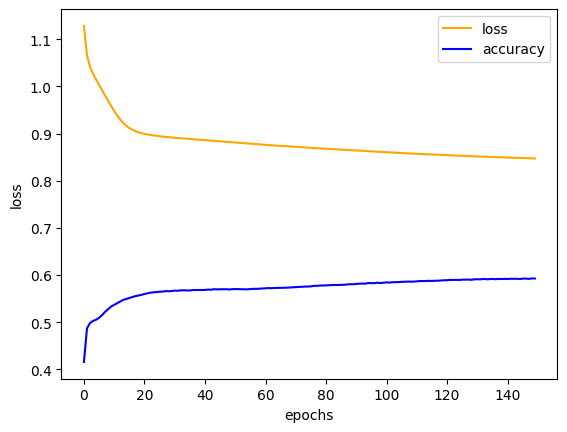

In [113]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 250us/step


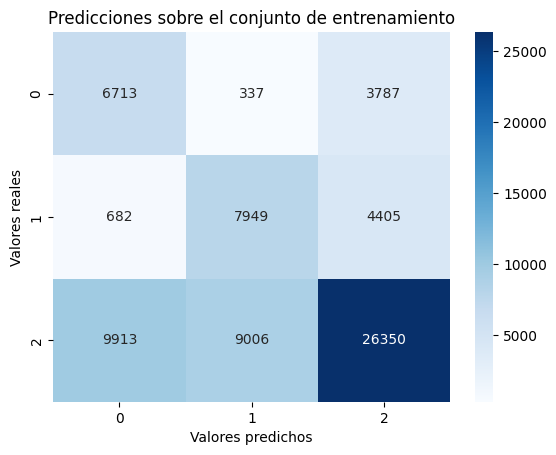

              precision    recall  f1-score   support

           0       0.39      0.62      0.48     10837
           1       0.46      0.61      0.52     13036
           2       0.76      0.58      0.66     45269

    accuracy                           0.59     69142
   macro avg       0.54      0.60      0.55     69142
weighted avg       0.65      0.59      0.61     69142

330/330 [==============================] - 0s 245us/step


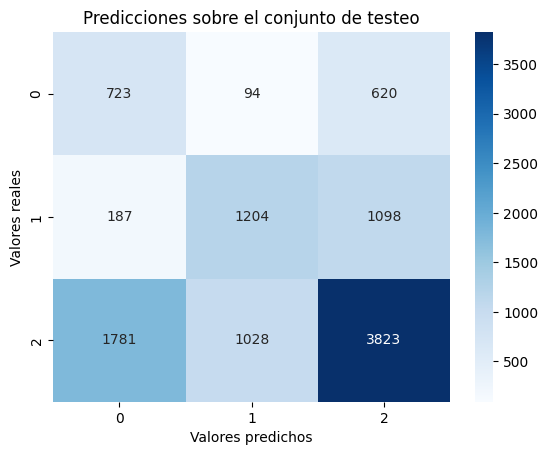

              precision    recall  f1-score   support

           0       0.27      0.50      0.35      1437
           1       0.52      0.48      0.50      2489
           2       0.69      0.58      0.63      6632

    accuracy                           0.54     10558
   macro avg       0.49      0.52      0.49     10558
weighted avg       0.59      0.54      0.56     10558



In [114]:
predicciones_clasificacion(mejor_modelo_2_capas_dse, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

##### Modelo 3 capas

In [115]:
def create_model_3_layers_expanded_ds(activation1, activation2, activation3, neurons_first_layer,neurons_hidden_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(neurons_hidden_layer, activation=activation2),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation3)
    ])
    
    modelo.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

modelo = KerasClassifier(build_fn=create_model_3_layers)

n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_layers, 
    activation3 = activation_last_layer,
    neurons_hidden_layer = cant_neuronas,
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)

grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, cv= 5, random_state= 14, verbose=False, scoring='accuracy')
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150


/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_7446/2362136590.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn=create_model_3_layers)


Epoch 1/150
Epoch 1/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0527 - accuracy: 0.4962
Epoch 2/150
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 1.1140 - accuracy: 0.3615
Epoch 2/150
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1.2073 - accuracy: 0.2542
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 1.1689 - accuracy: 0.3127
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1.2780 - accuracy: 0.2634
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.3899
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0220 - accuracy: 0.4895
Epoch 3/150
55/55 [==============================] - 0s 960us/step - loss: 1.0076 - accuracy: 0.4964
Epoch 3/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0377 - accuracy: 0.4994
Epoch 3/150
55/55 [==============================] - 0s 1ms/step - loss

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 1/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8450 - accuracy: 0.5885
Epoch 149/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8447 - accuracy: 0.5893
Epoch 150/150
18/55 [========>.....................] - ETA: 0s - loss: 1.1258 - accuracy: 0.4111Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 4ms/step - loss: 1.0581 - accuracy: 0.4485
Epoch 2/150
55/55 [==============================] - 0s 4ms/step - loss: 1.0658 - accuracy: 0.4706
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9686 - accuracy: 0.5153
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0259 - accuracy: 0.4888
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0899 - accuracy: 0.4313
Epoch 2/150
29/55 [==============>...............] - ETA: 0s - loss: 0.9706 - accuracy: 0.5196

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 2ms/step - loss: 0.9626 - accuracy: 0.5246
Epoch 3/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0426 - accuracy: 0.5011
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9316 - accuracy: 0.5346
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9856 - accuracy: 0.5171
Epoch 3/150
55/55 [==============================] - 0s 960us/step - loss: 1.0015 - accuracy: 0.5031
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9372 - accuracy: 0.5351
Epoch 4/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9521 - accuracy: 0.5326
Epoch 4/150
55/55 [==============================] - 0s 5ms/step - loss: 1.0710 - accuracy: 0.4477
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9528 - accuracy: 0.5326
Epoch 4/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9123 - accuracy: 0.5473
Epoch 5/150
55/55 [=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 0.9025 - accuracy: 0.5570
Epoch 7/150
55/55 [==============================] - 0s 4ms/step - loss: 1.0419 - accuracy: 0.4930
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9175 - accuracy: 0.5540
Epoch 7/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8879 - accuracy: 0.5658
Epoch 8/150
55/55 [==============================] - 0s 5ms/step - loss: 1.0866 - accuracy: 0.4126
Epoch 2/150
55/55 [==============================] - 0s 4ms/step - loss: 1.0067 - accuracy: 0.5102
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8948 - accuracy: 0.5612
Epoch 8/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8780 - accuracy: 0.5757
Epoch 9/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0020 - accuracy: 0.5039
Epoch 3/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0191 - accuracy: 0.4993
Epoch 3/150
55/55 [===

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 1/150
Epoch 1/150
37/55 [===================>..........] - ETA: 0s - loss: 0.8205 - accuracy: 0.6041Epoch 1/150
Epoch 1/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8236 - accuracy: 0.6031
Epoch 143/150
55/55 [==============================] - 0s 991us/step - loss: 0.8244 - accuracy: 0.6030
Epoch 144/150
55/55 [==============================] - 0s 962us/step - loss: 0.8238 - accuracy: 0.6039
Epoch 145/150
290/433 [===================>..........] - ETA: 0s loss: 0.8009 - accuracy: 0.63

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 1.0844 - accuracy: 0.4037
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6035
Epoch 146/150
55/55 [==============================] - 0s 965us/step - loss: 0.9965 - accuracy: 0.5083
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 1.1674 - accuracy: 0.3866
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8234 - accuracy: 0.6036
Epoch 147/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0073 - accuracy: 0.4853
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9474 - accuracy: 0.5374
Epoch 4/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8231 - accuracy: 0.6031
Epoch 148/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9545 - accuracy: 0.5244
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9216 - accuracy: 0.5480
Epoch 5/150
55

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 2ms/step - loss: 0.8233 - accuracy: 0.6040
Epoch 149/150
Epoch 5/150
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9841 - accuracy: 0.5050
Epoch 3/150
37/55 [===================>..........] - ETA: 0s - loss: 0.9015 - accuracy: 0.5595Epoch 3/150
Epoch 6/150
55/55 [==============================] - 1s 2ms/step - loss: 1.1478 - accuracy: 0.4103
Epoch 2/150
55/55 [==============================] - 1s 3ms/step - loss: 1.3543 - accuracy: 0.2489
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0829 - accuracy: 0.3884
Epoch 3/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9033 - accuracy: 0.5582
Epoch 7/150
55/55 [==============================] - 0s 774us/step - loss: 0.9071 - accuracy: 0.5515
Epoch 7/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.6050
Epoch 150/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9372 - ac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 0.8902 - accuracy: 0.5631
Epoch 12/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.5752
Epoch 17/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8789 - accuracy: 0.5720
Epoch 14/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9589 - accuracy: 0.5167
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.5401
Epoch 13/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8698 - accuracy: 0.5718
Epoch 18/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9051 - accuracy: 0.5603
Epoch 14/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8814 - accuracy: 0.5746
Epoch 15/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8872 - accuracy: 0.5657
Epoch 13/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9263 - accuracy: 0.5292
Epoch 10/150
5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 0.8382 - accuracy: 0.5939
Epoch 136/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8442 - accuracy: 0.5958
Epoch 149/150
433/433 [==============================] - 0s 967us/step
Epoch 1/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8379 - accuracy: 0.5946
Epoch 137/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8441 - accuracy: 0.5940
Epoch 150/150
164/433 [==========>...................] - ETA: 0sEpoch 1/150
Epoch 1/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8377 - accuracy: 0.5942
Epoch 138/150
55/55 [==============================] - 0s 951us/step - loss: 0.8439 - accuracy: 0.5949


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 848us/step - loss: 0.8377 - accuracy: 0.5943
Epoch 139/150
55/55 [==============================] - 0s 750us/step - loss: 0.8375 - accuracy: 0.5946
Epoch 140/150
55/55 [==============================] - 0s 813us/step - loss: 0.8375 - accuracy: 0.5948
Epoch 141/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8371 - accuracy: 0.5952
Epoch 142/150
 9/55 [===>..........................] - ETA: 0s - loss: 1.4454 - accuracy: 0.2376 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 1.0226 - accuracy: 0.4989
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0452 - accuracy: 0.4944
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0392 - accuracy: 0.4585
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0481 - accuracy: 0.4519
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8369 - accuracy: 0.5944
Epoch 143/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.5304
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 1.2073 - accuracy: 0.3063
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9802 - accuracy: 0.5141
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9672 - accuracy: 0.5311
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9633 - accuracy: 0.5182
Epoch 3/150
55/55 [=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 2ms/step - loss: 0.8890 - accuracy: 0.5663
Epoch 6/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8368 - accuracy: 0.5943
Epoch 147/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.5557
Epoch 5/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.5570
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9032 - accuracy: 0.5604
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8961 - accuracy: 0.5643
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9250 - accuracy: 0.5459
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9208 - accuracy: 0.5488
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8364 - accuracy: 0.5952
Epoch 148/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.5726
Epoch 7/150
55/55 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.5937
Epoch 18/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.5795
Epoch 17/150
Epoch 17/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8712 - accuracy: 0.5749
Epoch 17/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.5884
Epoch 13/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8702 - accuracy: 0.5780
Epoch 15/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8612 - accuracy: 0.5836
Epoch 11/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8493 - accuracy: 0.5902
Epoch 16/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.5763
Epoch 18/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8539 - accuracy: 0.5917
Epoch 14/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8771 - accuracy: 0.5736


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


Epoch 1/150
55/55 [==============================] - 0s 1ms/step - loss: 0.7987 - accuracy: 0.6181
Epoch 150/150
55/55 [==============================] - 0s 2ms/step - loss: 0.7960 - accuracy: 0.6192
Epoch 150/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8051 - accuracy: 0.6166
Epoch 136/150
55/55 [==============================] - 0s 2ms/step - loss: 0.7985 - accuracy: 0.6220
Epoch 149/150
55/55 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.6189
Epoch 148/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8049 - accuracy: 0.6156
Epoch 137/150
55/55 [==============================] - 0s 1ms/step - loss: 0.7976 - accuracy: 0.6195
Epoch 149/150
55/55 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.6213
Epoch 150/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8050 - accuracy: 0.6168
Epoch 138/150
 1/55 [..............................] - ETA: 0s - loss: 0.7865 - accuracy: 0.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 2ms/step - loss: 0.7976 - accuracy: 0.6198
Epoch 150/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8051 - accuracy: 0.6177
Epoch 139/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0745 - accuracy: 0.3979
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8055 - accuracy: 0.6162
Epoch 140/150
55/55 [==============================] - 0s 955us/step - loss: 1.0181 - accuracy: 0.5029
Epoch 3/150
55/55 [==============================] - 0s 658us/step - loss: 1.0025 - accuracy: 0.5073
Epoch 4/150
 1/55 [..............................] - ETA: 9s - loss: 1.1168 - accuracy: 0.3154

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 0.8046 - accuracy: 0.6179
Epoch 141/150
55/55 [==============================] - 0s 771us/step - loss: 0.9887 - accuracy: 0.5122
Epoch 5/150
55/55 [==============================] - 0s 1ms/step - loss: 1.2352 - accuracy: 0.2538
Epoch 2/150
55/55 [==============================] - 0s 845us/step - loss: 0.9753 - accuracy: 0.5164
Epoch 6/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8037 - accuracy: 0.6185
Epoch 142/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0805 - accuracy: 0.3933
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 1.1199 - accuracy: 0.2887
Epoch 3/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9605 - accuracy: 0.5222
Epoch 7/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8033 - accuracy: 0.6170
Epoch 143/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0325 - accuracy: 0.4974
Epoch 3/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 2ms/step - loss: 1.1268 - accuracy: 0.3220
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0209 - accuracy: 0.5004
Epoch 5/150
Epoch 4/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9820 - accuracy: 0.5027
Epoch 7/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9075 - accuracy: 0.5538
Epoch 12/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8036 - accuracy: 0.6178
Epoch 147/150
55/55 [==============================] - 0s 1ms/step - loss: 1.0114 - accuracy: 0.4897
Epoch 5/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9500 - accuracy: 0.5215
Epoch 3/150
Epoch 6/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9658 - accuracy: 0.5119
Epoch 8/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9733 - accuracy: 0.5212
Epoch 9/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9029 - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 0.8956 - accuracy: 0.5687
Epoch 10/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8775 - accuracy: 0.5728
Epoch 26/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8846 - accuracy: 0.5703
Epoch 18/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8885 - accuracy: 0.5715
Epoch 13/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8916 - accuracy: 0.5695
Epoch 19/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8794 - accuracy: 0.5757
Epoch 15/150
55/55 [==============================] - 0s 1ms/step - loss: 0.9017 - accuracy: 0.5437
Epoch 22/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8882 - accuracy: 0.5660
Epoch 22/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8764 - accuracy: 0.5741
Epoch 27/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8920 - accuracy: 0.5705
Epoch 11/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5883
Epoch 31/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8650 - accuracy: 0.5773
Epoch 41/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.5794
Epoch 20/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8631 - accuracy: 0.5811
Epoch 44/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8491 - accuracy: 0.5899
Epoch 36/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8615 - accuracy: 0.5777
Epoch 49/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.5865
Epoch 35/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8708 - accuracy: 0.5766
Epoch 43/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8532 - accuracy: 0.5881
Epoch 32/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8681 - accuracy: 0.5796
Epoch 21/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 1ms/step - loss: 0.8048 - accuracy: 0.6181
Epoch 137/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8155 - accuracy: 0.6105
Epoch 105/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8122 - accuracy: 0.6106
Epoch 124/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8070 - accuracy: 0.6146
Epoch 141/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8081 - accuracy: 0.6129
Epoch 140/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8048 - accuracy: 0.6182
Epoch 138/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8148 - accuracy: 0.6110
Epoch 106/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.6106
Epoch 125/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8078 - accuracy: 0.6135
Epoch 141/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8048 - accuracy: 0.6178
Epoc

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 980us/step - loss: 0.8045 - accuracy: 0.6186
Epoch 143/150
55/55 [==============================] - 0s 972us/step - loss: 0.8139 - accuracy: 0.6127
Epoch 111/150
55/55 [==============================] - 0s 950us/step - loss: 0.8067 - accuracy: 0.6144
Epoch 146/150
55/55 [==============================] - 0s 929us/step - loss: 0.8058 - accuracy: 0.6145
Epoch 147/150
55/55 [==============================] - 0s 919us/step - loss: 0.8112 - accuracy: 0.6116
Epoch 130/150
55/55 [==============================] - 0s 913us/step - loss: 0.8039 - accuracy: 0.6176
Epoch 144/150
55/55 [==============================] - 0s 890us/step - loss: 0.8068 - accuracy: 0.6143
Epoch 147/150
55/55 [==============================] - 0s 897us/step - loss: 0.8054 - accuracy: 0.6148
Epoch 148/150
55/55 [==============================] - 0s 911us/step - loss: 0.8114 - accuracy: 0.6113
Epoch 131/150
55/55 [==============================] - 0s 873us/step - loss: 0.8035 - a

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 758us/step - loss: 0.8092 - accuracy: 0.6125
Epoch 142/150
55/55 [==============================] - 0s 725us/step - loss: 0.8111 - accuracy: 0.6131
Epoch 124/150
55/55 [==============================] - 0s 733us/step - loss: 0.8105 - accuracy: 0.6135
Epoch 143/150
Epoch 125/150
55/55 [==============================] - 0s 704us/step - loss: 0.8108 - accuracy: 0.6132
Epoch 126/150
55/55 [==============================] - 0s 717us/step - loss: 0.8092 - accuracy: 0.6127
Epoch 144/150
55/55 [==============================] - 0s 682us/step - loss: 0.8108 - accuracy: 0.6130
Epoch 127/150
55/55 [==============================] - 0s 700us/step - loss: 0.8090 - accuracy: 0.6129
Epoch 145/150
55/55 [==============================] - 0s 683us/step - loss: 0.8104 - accuracy: 0.6134
Epoch 128/150
55/55 [==============================] - 0s 697us/step - loss: 0.8090 - accuracy: 0.6126
Epoch 146/150
55/55 [==============================] - 0s 691us/step - lo

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


55/55 [==============================] - 0s 657us/step - loss: 0.8077 - accuracy: 0.6147
Epoch 141/150
55/55 [==============================] - 0s 661us/step - loss: 0.8075 - accuracy: 0.6157
Epoch 142/150
55/55 [==============================] - 0s 663us/step - loss: 0.8072 - accuracy: 0.6154
Epoch 143/150
55/55 [==============================] - 0s 651us/step - loss: 0.8070 - accuracy: 0.6150
Epoch 144/150
55/55 [==============================] - 0s 662us/step - loss: 0.8074 - accuracy: 0.6148
Epoch 145/150
55/55 [==============================] - 0s 659us/step - loss: 0.8066 - accuracy: 0.6157
Epoch 146/150
55/55 [==============================] - 0s 666us/step - loss: 0.8066 - accuracy: 0.6158
Epoch 147/150
55/55 [==============================] - 0s 660us/step - loss: 0.8065 - accuracy: 0.6155
Epoch 148/150
55/55 [==============================] - 0s 667us/step - loss: 0.8068 - accuracy: 0.6153
Epoch 149/150
55/55 [==============================] - 0s 661us/step - loss: 0.8067 - a

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score


68/68 [==============================] - 0s 621us/step - loss: 1.0442 - accuracy: 0.4999
Epoch 2/150
68/68 [==============================] - 0s 574us/step - loss: 1.0055 - accuracy: 0.5034
Epoch 3/150
68/68 [==============================] - 0s 568us/step - loss: 0.9839 - accuracy: 0.5148
Epoch 4/150
68/68 [==============================] - 0s 574us/step - loss: 0.9622 - accuracy: 0.5264
Epoch 5/150
68/68 [==============================] - 0s 575us/step - loss: 0.9413 - accuracy: 0.5367
Epoch 6/150
68/68 [==============================] - 0s 569us/step - loss: 0.9246 - accuracy: 0.5429
Epoch 7/150
68/68 [==============================] - 0s 567us/step - loss: 0.9135 - accuracy: 0.5491
Epoch 8/150
68/68 [==============================] - 0s 577us/step - loss: 0.9062 - accuracy: 0.5559
Epoch 9/150
68/68 [==============================] - 0s 577us/step - loss: 0.9012 - accuracy: 0.5604
Epoch 10/150
68/68 [==============================] - 0s 572us/step - loss: 0.8974 - accuracy: 0.5638
E

In [117]:
grid_result.best_params_

{'neurons_hidden_layer': 7,
 'neurons_first_layer': 7,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 14,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1024,
 'activation3': 'softmax',
 'activation2': 'tanh',
 'activation1': 'sigmoid'}

In [118]:
params = grid_result.best_params_
mejor_modelo_3_capas_dse = create_model_3_layers(params['activation1'], params['activation2'], params['activation3'],params['neurons_first_layer'], params['neurons_hidden_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_3_capas_dse.summary()
mejor_modelo_3_capas_dse.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.0009),
    loss='categorical_crossentropy',
    metrics='accuracy'
)
cant_epochs = 150

x = mejor_modelo_3_capas_dse.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 7)                 105       
                                                                 
 dense_30 (Dense)            (None, 7)                 56        
                                                                 
 dense_31 (Dense)            (None, 3)                 24        
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


Vemos como el modelo converge correctamente

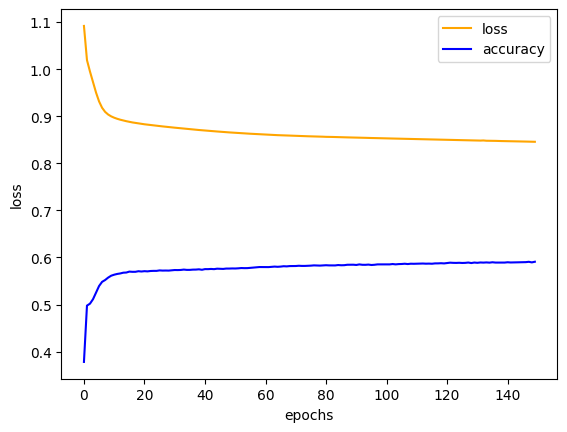

In [119]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 259us/step


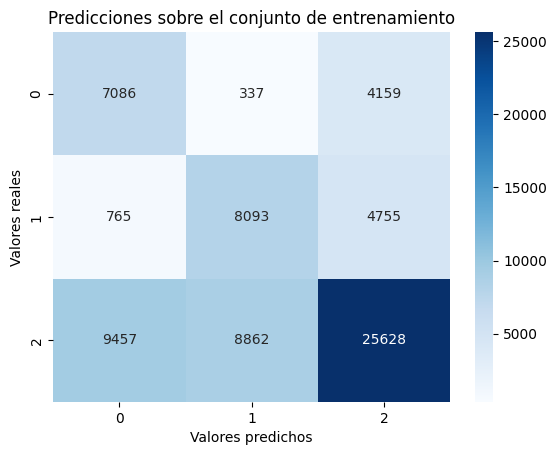

              precision    recall  f1-score   support

           0       0.41      0.61      0.49     11582
           1       0.47      0.59      0.52     13613
           2       0.74      0.58      0.65     43947

    accuracy                           0.59     69142
   macro avg       0.54      0.60      0.56     69142
weighted avg       0.63      0.59      0.60     69142

330/330 [==============================] - 0s 251us/step


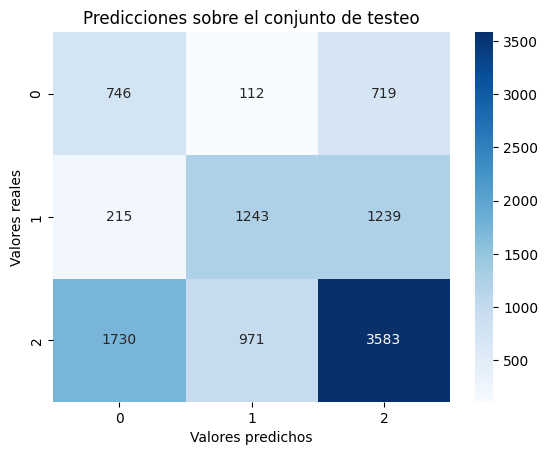

              precision    recall  f1-score   support

           0       0.28      0.47      0.35      1577
           1       0.53      0.46      0.49      2697
           2       0.65      0.57      0.61      6284

    accuracy                           0.53     10558
   macro avg       0.49      0.50      0.48     10558
weighted avg       0.56      0.53      0.54     10558



In [120]:
predicciones_clasificacion(mejor_modelo_3_capas_dse, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

Vemos como las soluciones con capa oculta no difieren fuertemente en las métricas para este problema, pero vemos como en ambos casos de diferentes datasets dan ligeramente mejor las métricas en los modelos de capa oculta

Entre los 2 modelos utilizando el dataset del TP1 nos quedamos con el que  tiene la capa oculta ya que da levemente mejor las métricas al probar con el dataset de test

In [121]:
dump(mejor_modelo_3_capas, 'models/redes_neuronales_clasificacion.joblib')

INFO:tensorflow:Assets written to: ram://8cef4b18-4e1d-45af-b4c0-86e14673651e/assets


['models/redes_neuronales_clasificacion.joblib']

## Ensambles de modelos

### Ensamble Voting

Un modelo de ensamble es un modelo de machine learning que combina las predicciones de multiples modelos.

Un ensamble de tipo Voting puede ser utilizado para problemas de clasificacion o problemas de regresion. En el caso de clasificacion, las predicciones de cada label son sumadas y el label con mayoria de votos es el predicho.

Hay dos approaches para la votacion de la mayoria en los problemas de clasificacion.

1. Hard Voting = Predice la clase con la mayor cantidad de votos de los modelos.
2. Soft Voting = Predice la clase con la mayor suma de probabilidad de los modelos.

Nosotros haremos un analisis con los 2 approaches y despues de ver las metricas, nos quedaremos con el que mejor se ajuste a nuestro problema.

##### Hard Voting

Droppeamos la columna place_l3 ya que estaba dandonos peores valores en las metricas.

In [122]:
x_train_cls = x_train.drop(axis=1, columns='place_l3')
x_test_cls = x_test.drop(axis=1, columns='place_l3')

Factorizamos el precio Bajo, Medio, Alto en los valores 0, 1, 2 para que los modelos funcionen correctamente

In [123]:
y_train_clasificacion_factorized = y_train_clasificacion.replace(['Bajo', 'Medio', 'Alto'],[0,1,2])
y_test_clasificacion_factorized = y_test_clasificacion.replace(['Bajo', 'Medio', 'Alto'],[0,1,2])

Realizamos una prediccion con el arbol de clasificacion

In [124]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_model = dtc.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_dtc = dtc_model.predict(x_test_cls)

In [125]:
print(classification_report(y_test_clasificacion_factorized, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2326
           1       0.70      0.71      0.70      5541
           2       0.62      0.62      0.62      2691

    accuracy                           0.67     10558
   macro avg       0.65      0.65      0.65     10558
weighted avg       0.67      0.67      0.67     10558



Realizamos una prediccion con el modelo de regresion logistica

In [126]:
lr = LogisticRegression()
lr_model = lr.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_lr = lr_model.predict(x_test_cls)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
print(classification_report(y_test_clasificacion_factorized, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.08      0.14      2326
           1       0.54      0.96      0.69      5541
           2       0.57      0.07      0.13      2691

    accuracy                           0.54     10558
   macro avg       0.56      0.37      0.32     10558
weighted avg       0.55      0.54      0.43     10558



Realizamos una prediccion con el modelo de naive bayes

In [128]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_gnb = gnb_model.predict(x_test_cls)

In [129]:
print(classification_report(y_test_clasificacion_factorized, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.54      0.20      0.30      2326
           1       0.55      0.80      0.65      5541
           2       0.40      0.25      0.30      2691

    accuracy                           0.53     10558
   macro avg       0.50      0.42      0.42     10558
weighted avg       0.51      0.53      0.49     10558



Realizamos una prediccion con el modelo clasificador de bosque aleatorio

In [130]:
rmf = RandomForestClassifier(random_state=14)
rmf_model = rmf.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_rmf = rmf_model.predict(x_test_cls)

In [131]:
print(classification_report(y_test_clasificacion_factorized, y_pred_rmf))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      2326
           1       0.72      0.84      0.77      5541
           2       0.75      0.62      0.68      2691

    accuracy                           0.74     10558
   macro avg       0.75      0.70      0.72     10558
weighted avg       0.74      0.74      0.73     10558



Realizamos una prediccion con el modelo clasificador de KNN

In [132]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_knn = knn_model.predict(x_test_cls)

In [133]:
print(classification_report(y_test_clasificacion_factorized, y_pred_knn))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49      2326
           1       0.66      0.66      0.66      5541
           2       0.53      0.51      0.52      2691

    accuracy                           0.59     10558
   macro avg       0.56      0.56      0.56     10558
weighted avg       0.59      0.59      0.59     10558



Realizamos una prediccion con el modelo linear SVC

In [134]:
svm = LinearSVC()
svm_model = svm.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_svm = svm_model.predict(x_test_cls)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [135]:
print(classification_report(y_test_clasificacion_factorized, y_pred_svm))

              precision    recall  f1-score   support

           0       0.67      0.01      0.02      2326
           1       0.53      1.00      0.69      5541
           2       0.00      0.00      0.00      2691

    accuracy                           0.53     10558
   macro avg       0.40      0.34      0.24     10558
weighted avg       0.42      0.53      0.37     10558



Creamos un clasificador de votacion con votacion dura

In [136]:
voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('knn', KNeighborsClassifier(n_neighbors=1)),
                  ('rfc', RandomForestClassifier(random_state= 42))], 
    voting='hard')

Hacemos predicciones con el modelo de votacion duro

In [137]:
voting_classifier_hard.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_vch = voting_classifier_hard.predict(x_test_cls)

Evaluamos el modelo con la metrica f-1 score

In [138]:
f1_vch = f1_score(y_test_clasificacion_factorized, y_pred_vch, average='micro')

Imprimimos la metrica de f-1 score

In [139]:
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))

F1-score of the hard voting classifier: 0.7017


In [140]:
print(classification_report(y_test_clasificacion_factorized, y_pred_vch))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      2326
           1       0.72      0.78      0.75      5541
           2       0.74      0.58      0.65      2691

    accuracy                           0.70     10558
   macro avg       0.70      0.67      0.68     10558
weighted avg       0.70      0.70      0.70     10558



##### Soft Voting

Creamos un clasificador suave con votacion suave

In [141]:
voting_classifier_soft =  VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('knn', KNeighborsClassifier(n_neighbors=1)),
                  ('rfc', RandomForestClassifier(random_state=42))], 
    voting='soft')

Hacemos predicciones con el modelo de votacion suave

In [142]:
voting_classifier_soft.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_vcs = voting_classifier_soft.predict(x_test_cls)

Evaluamos el modelo con la metrica f-1 score

In [143]:
f1_vcs = f1_score(y_test_clasificacion_factorized, y_pred_vcs, average='micro')

Imprimimos la metrica f-1 score

In [144]:
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

F1-score of the soft voting classifier: 0.7041


In [145]:
print(classification_report(y_test_clasificacion_factorized, y_pred_vcs))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67      2326
           1       0.70      0.79      0.74      5541
           2       0.69      0.61      0.65      2691

    accuracy                           0.70     10558
   macro avg       0.70      0.67      0.69     10558
weighted avg       0.70      0.70      0.70     10558



In [146]:
dump(voting_classifier_soft, 'models/ensamble_voting_soft.joblib')
dump(voting_classifier_hard, 'models/ensamble_voting_hard.joblib')


['models/ensamble_voting_hard.joblib']

Soft y Hard Voting nos dieron como resultado un valor de accuracy de 0,70. Logramos optimizar mucho estos valores a traves de la utilizacion y comparacion de varios modelos.

### Ensamble Stacking

El ensamble de stacking es un enmsamble de los algoritmos de machine learning que aprende como mejor combinar las predicciones de multples bien performantes modelos de machine learning para obtener la mejor prediccion posible.

Vamos a utilizar KNN, SV, Random Forest y Regresion Lineal.

Tambien vamos a definir un regresor de Stacking del modulo de Scikit Learn’s, seteando los estimadores base como los modelos base y como estimador finaluna regresion lineal con 5 cross folds.

In [148]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR()),
    ('Random Forest', RandomForestRegressor(random_state=14)),
    ('Linear Regression', LinearRegression()),
]
stacked = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5)

Luego, vamos a fittear los modelos base y predecir la data de test que ya habiamos previamente separado en train (80%) y test (20%) para asi poder comparar los resultado con el ensamble regresor.

In [150]:
import time
from collections import defaultdict

#Guarda los scores de cada modelo
model_scores = defaultdict()

for name, model in base_models:
    start_time = time.time()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    end_time = time.time()

    r2 = model.score(x_test, y_test)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    model_scores[name] = r2

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")

start_time = time.time()
stacked.fit(x_train, y_train)
stacked_prediction = stacked.predict(x_test)
end_time = time.time()
stacked_r2 = stacked.score(x_test, y_test)
model_scores['Stacking'] = stacked_r2
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared=False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")


-------KNN-------
Coefficient of determination: 0.6992473477469884
Root Mean Squared Error: 75357.74700913092
Computation Time: 0.11060595512390137
----------------------------------

-------SVR-------
Coefficient of determination: -0.009742634904310377
Root Mean Squared Error: 138079.28192001078
Computation Time: 227.36018586158752
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9095690786164247
Root Mean Squared Error: 41322.03019219846
Computation Time: 22.181861877441406
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.7966223729893203
Root Mean Squared Error: 61969.03891051737
Computation Time: 0.05403399467468262
----------------------------------

-------Stacked Ensemble-------
Coefficient of determination: 0.9097278953592723
Root Mean Squared Error: 41285.72892470165
Computation Time: 1004.460587978363
----------------------------------


El coeficiente de determinacion (R²) mide cuan bien un modelo estadistico predice un resultado. El resultado es representado por la variable dependiente del modelo.

El valor mas bajo de R² es 0 y el más alto posible es 1. Si el modelo se acerca a 1, significa que es muy bueno a la hora de hacer predicciones. Nos basaremos en esta metrica para hacer el analisis

El top 3 de los mejores modelos son:

    1. Ensamble de Stacking
    2. Random Forest
    3. Linear Regression

El Ensamble y Random Forest estan a la par, mientras que Regresion lineal se separa por un muy pequeño porcentaje. El ensamble logra obtener grandes reusltados dada su naturaleza. El ensamble logra optimizar las mejores combinaciones lineales de los modelos permitiendonos obtener una mejor mezcla de diversidad de cada modelo y de cada predicción.
La unica contra que parece tener el ensamble es el tiempo computacional que tarda. Por todos los motivos mencionados con anterioridad, nos quedamos como mejor modelo con el ensamble.

In [151]:
dump(stacked, 'models/ensamble_stacking.joblib')


['models/ensamble_stacking.joblib']

## Conclusiones

De este ultimo trabajo, en correlación también con el trabajo anterior, nos llevamos la experiencia de haber podido trabajar con datos reales. Fue una gran experiencia haber podido pensar y realizar practicas propias del área de ciencia de datos. Realizar todos estos análisis nos brindo la posibilidad de adentrarnos mas de lleno en este dominio de problema y poder enfrentar diversas soluciones para poder rescatar o entender mejor los datos que estábamos procesando. Fue crucial haber podido plantear diversos métodos para entender que estaba ocurriendo con las propiedades en venta. Como habíamos mencionado en el primer trabajo, usar y analizar datos reales nos permitió desmitificar creencias no respaldadas que teníamos sobre la venta de propiedades y también poder reforzar las ideas que eran correctas a traves de los datos. De esta ultima parte, nos llevamos la construcción de nuevos features que nos permitieron poder crear nuevos modelos, algunos a traves de redes, y otros a traves de ensambles y compararlos contra lo que ya habíamos realizado. Esto nos permitió jugar mas con las métricas y ver distintas maneras de optimizar estos resultados.